# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

# Load the Dataset

In [4]:
gt=pd.read_csv('gas_turbines.csv')
gt.drop(columns = ['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'], inplace = True)
gt

AT      AP      AH     TEY
0      6.8594  1007.9  96.799  114.70
1      6.7850  1008.4  97.118  114.72
2      6.8977  1008.8  95.939  114.71
3      7.0569  1009.2  95.249  114.72
4      7.3978  1009.7  95.150  114.72
...       ...     ...     ...     ...
15034  9.0301  1005.6  98.460  111.61
15035  7.8879  1005.9  99.093  111.78
15036  7.2647  1006.3  99.496  110.19
15037  7.0060  1006.8  99.008  110.74
15038  6.9279  1007.2  97.533  111.58

[15039 rows x 4 columns]

# Performing EDA

In [5]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [6]:
gt.describe()

AT           AP            AH           TEY
count  15039.000000  15039.00000  15039.000000  15039.000000
mean      17.764381   1013.19924     79.124174    134.188464
std        7.574323      6.41076     13.793439     15.829717
min        0.522300    985.85000     30.344000    100.170000
25%       11.408000   1008.90000     69.750000    127.985000
50%       18.186000   1012.80000     82.266000    133.780000
75%       23.862500   1016.90000     90.043500    140.895000
max       34.929000   1034.20000    100.200000    174.610000

In [7]:
gt.isna().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

# Visualizing The Data

In [8]:
#Ploting Boxplot

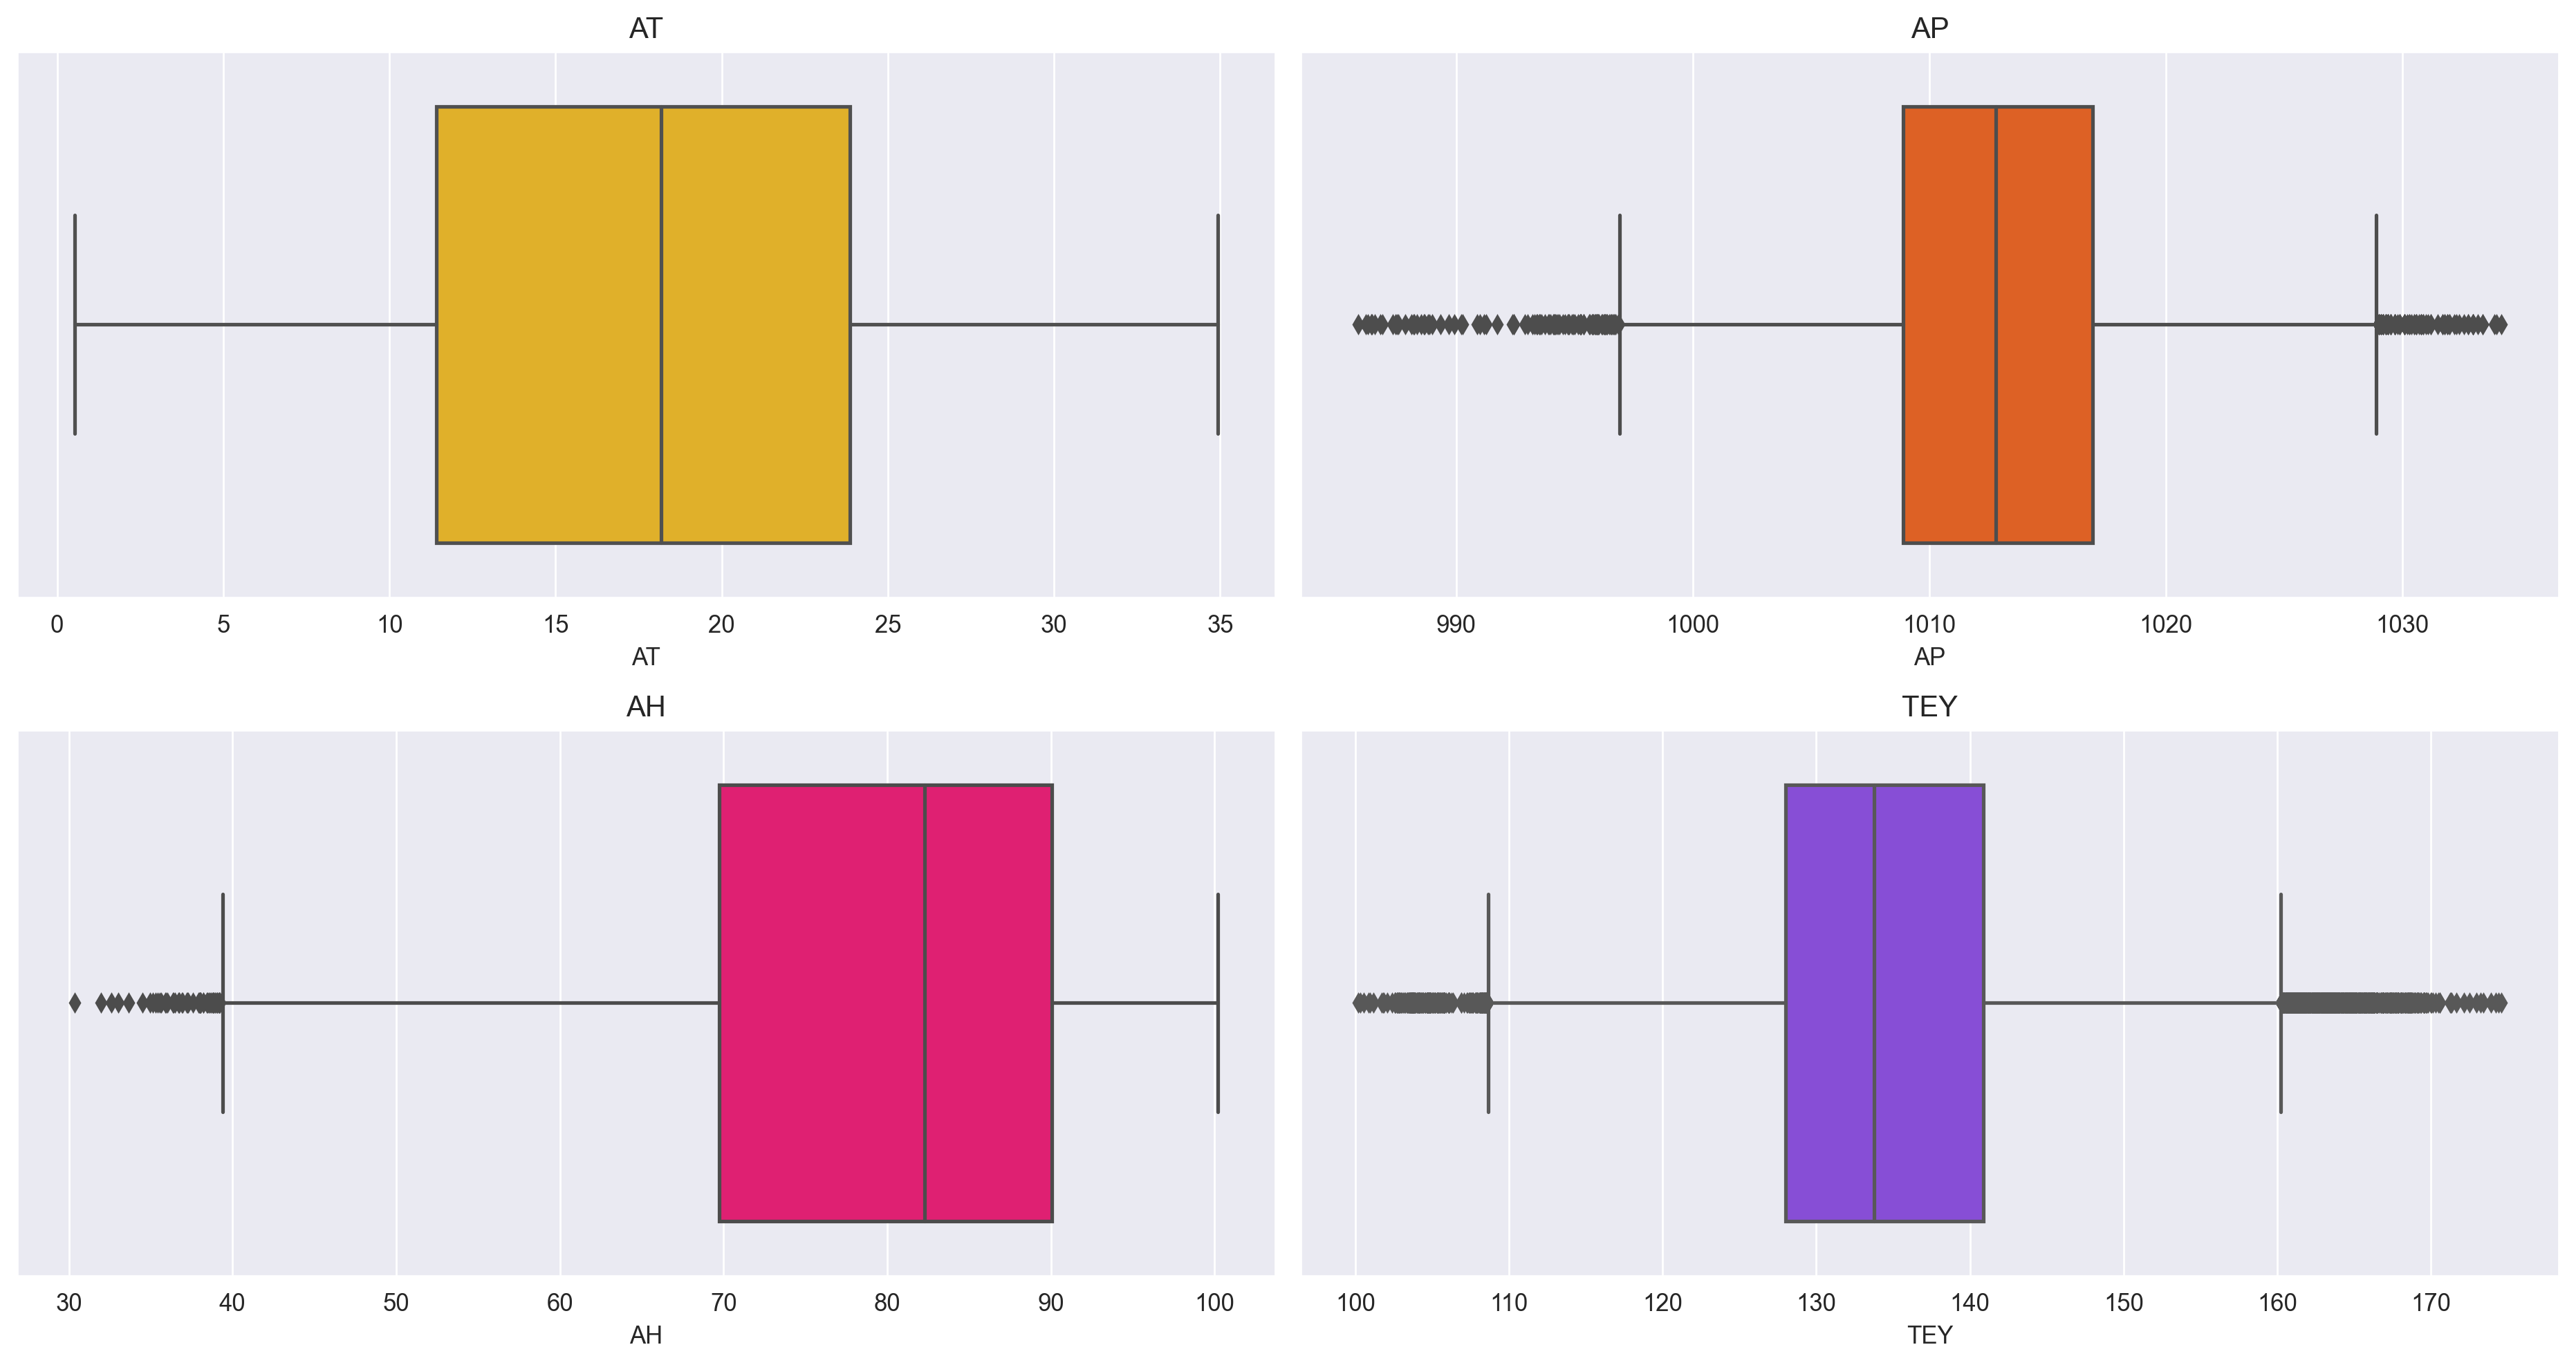

In [9]:
fig,ax = plt.subplots(2, 2)

ax[0, 0].title.set_text('AT')
sns.boxplot(gt['AT'], ax = ax[0, 0], palette = ['#ffbe0b'], orient = 'h')

ax[0, 1].title.set_text('AP')
sns.boxplot(gt['AP'], ax = ax[0, 1], palette = ['#fb5607'], orient = 'h')

ax[1, 0].title.set_text('AH')
sns.boxplot(gt['AH'], ax = ax[1, 0], palette = ['#ff006e'], orient = 'h')

ax[1, 1].title.set_text('TEY')
sns.boxplot(gt['TEY'], ax = ax[1, 1], palette = ['#8338ec'], orient = 'h')

plt.tight_layout()

In [10]:
#Ploting Distplot

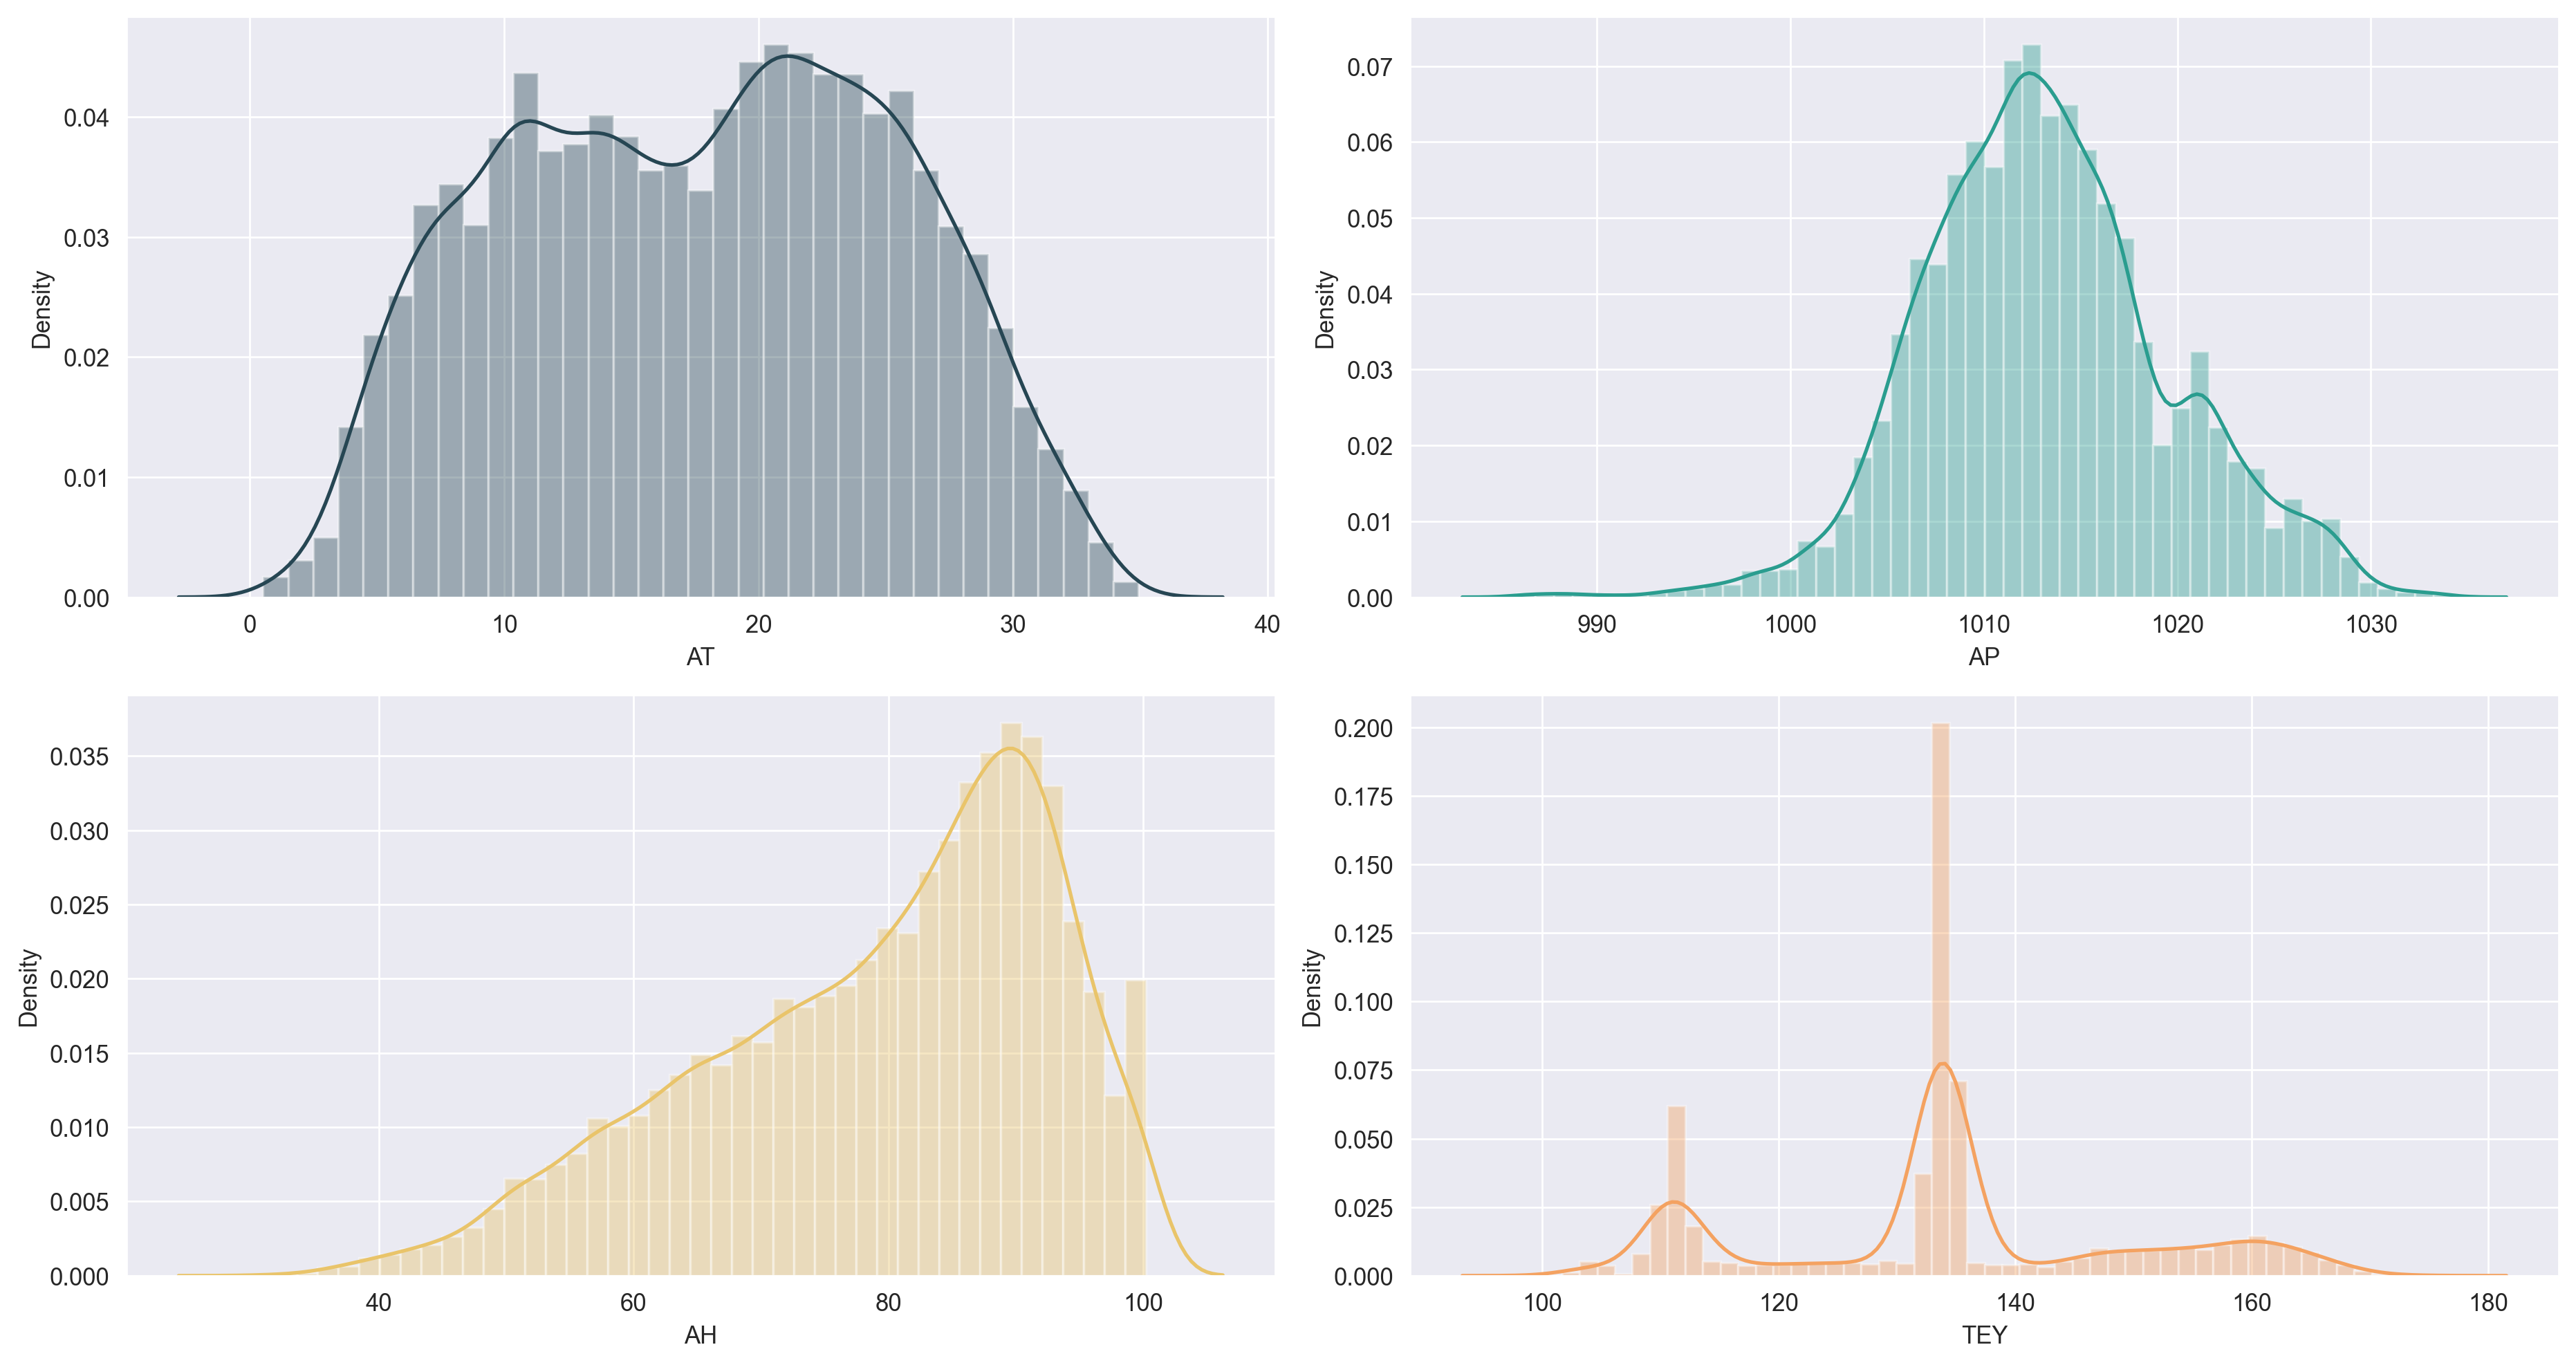

In [11]:
fig,ax = plt.subplots(2, 2)


sns.distplot(gt['AT'], ax = ax[0, 0], color = '#264653')


sns.distplot(gt['AP'], ax = ax[0, 1], color = '#2a9d8f')


sns.distplot(gt['AH'], ax = ax[1, 0], color = '#e9c46a')


sns.distplot(gt['TEY'], ax = ax[1, 1], color = '#f4a261')

plt.tight_layout()

In [12]:
#Ploting QQ-Plot

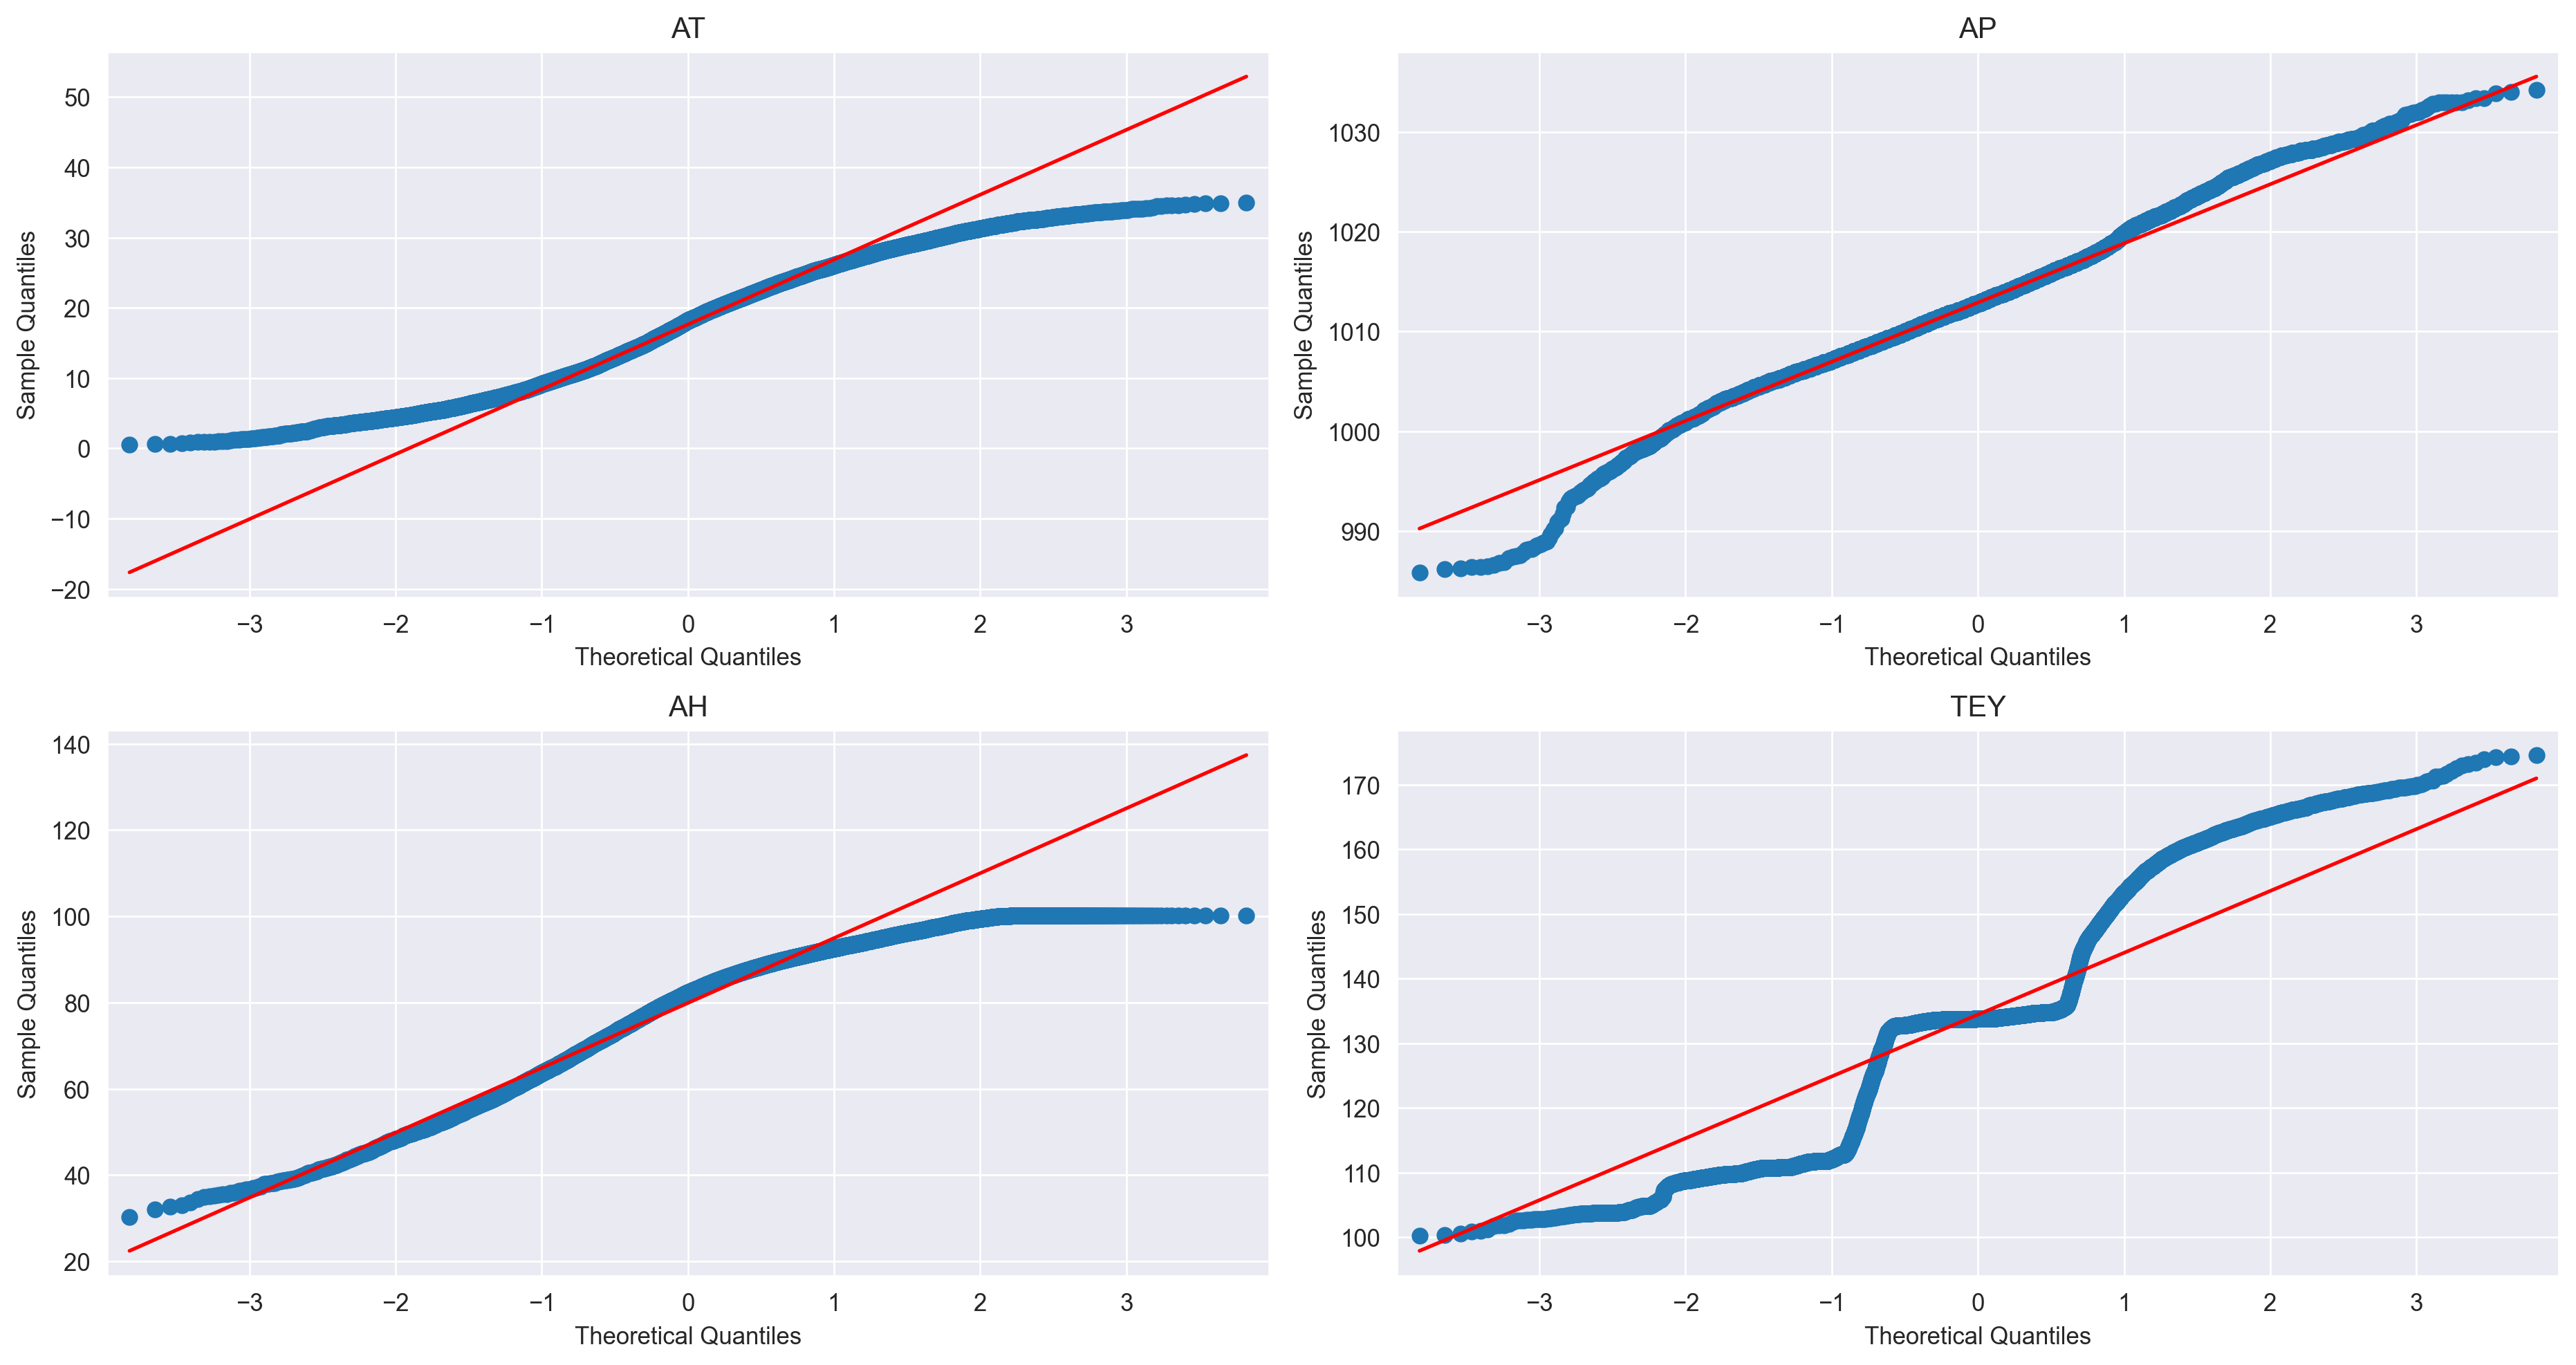

In [13]:
fig,ax = plt.subplots(2, 2)

ax[0, 0].title.set_text('AT')
sm.qqplot(gt['AT'], ax = ax[0, 0], line = 'q')

ax[0, 1].title.set_text('AP')
sm.qqplot(gt['AP'], ax = ax[0, 1], line = 'q')

ax[1, 0].title.set_text('AH')
sm.qqplot(gt['AH'], ax = ax[1, 0], line = 'q')

ax[1, 1].title.set_text('TEY')
sm.qqplot(gt['TEY'], ax = ax[1, 1], line = 'q')

plt.tight_layout()

# Correlation Analysis

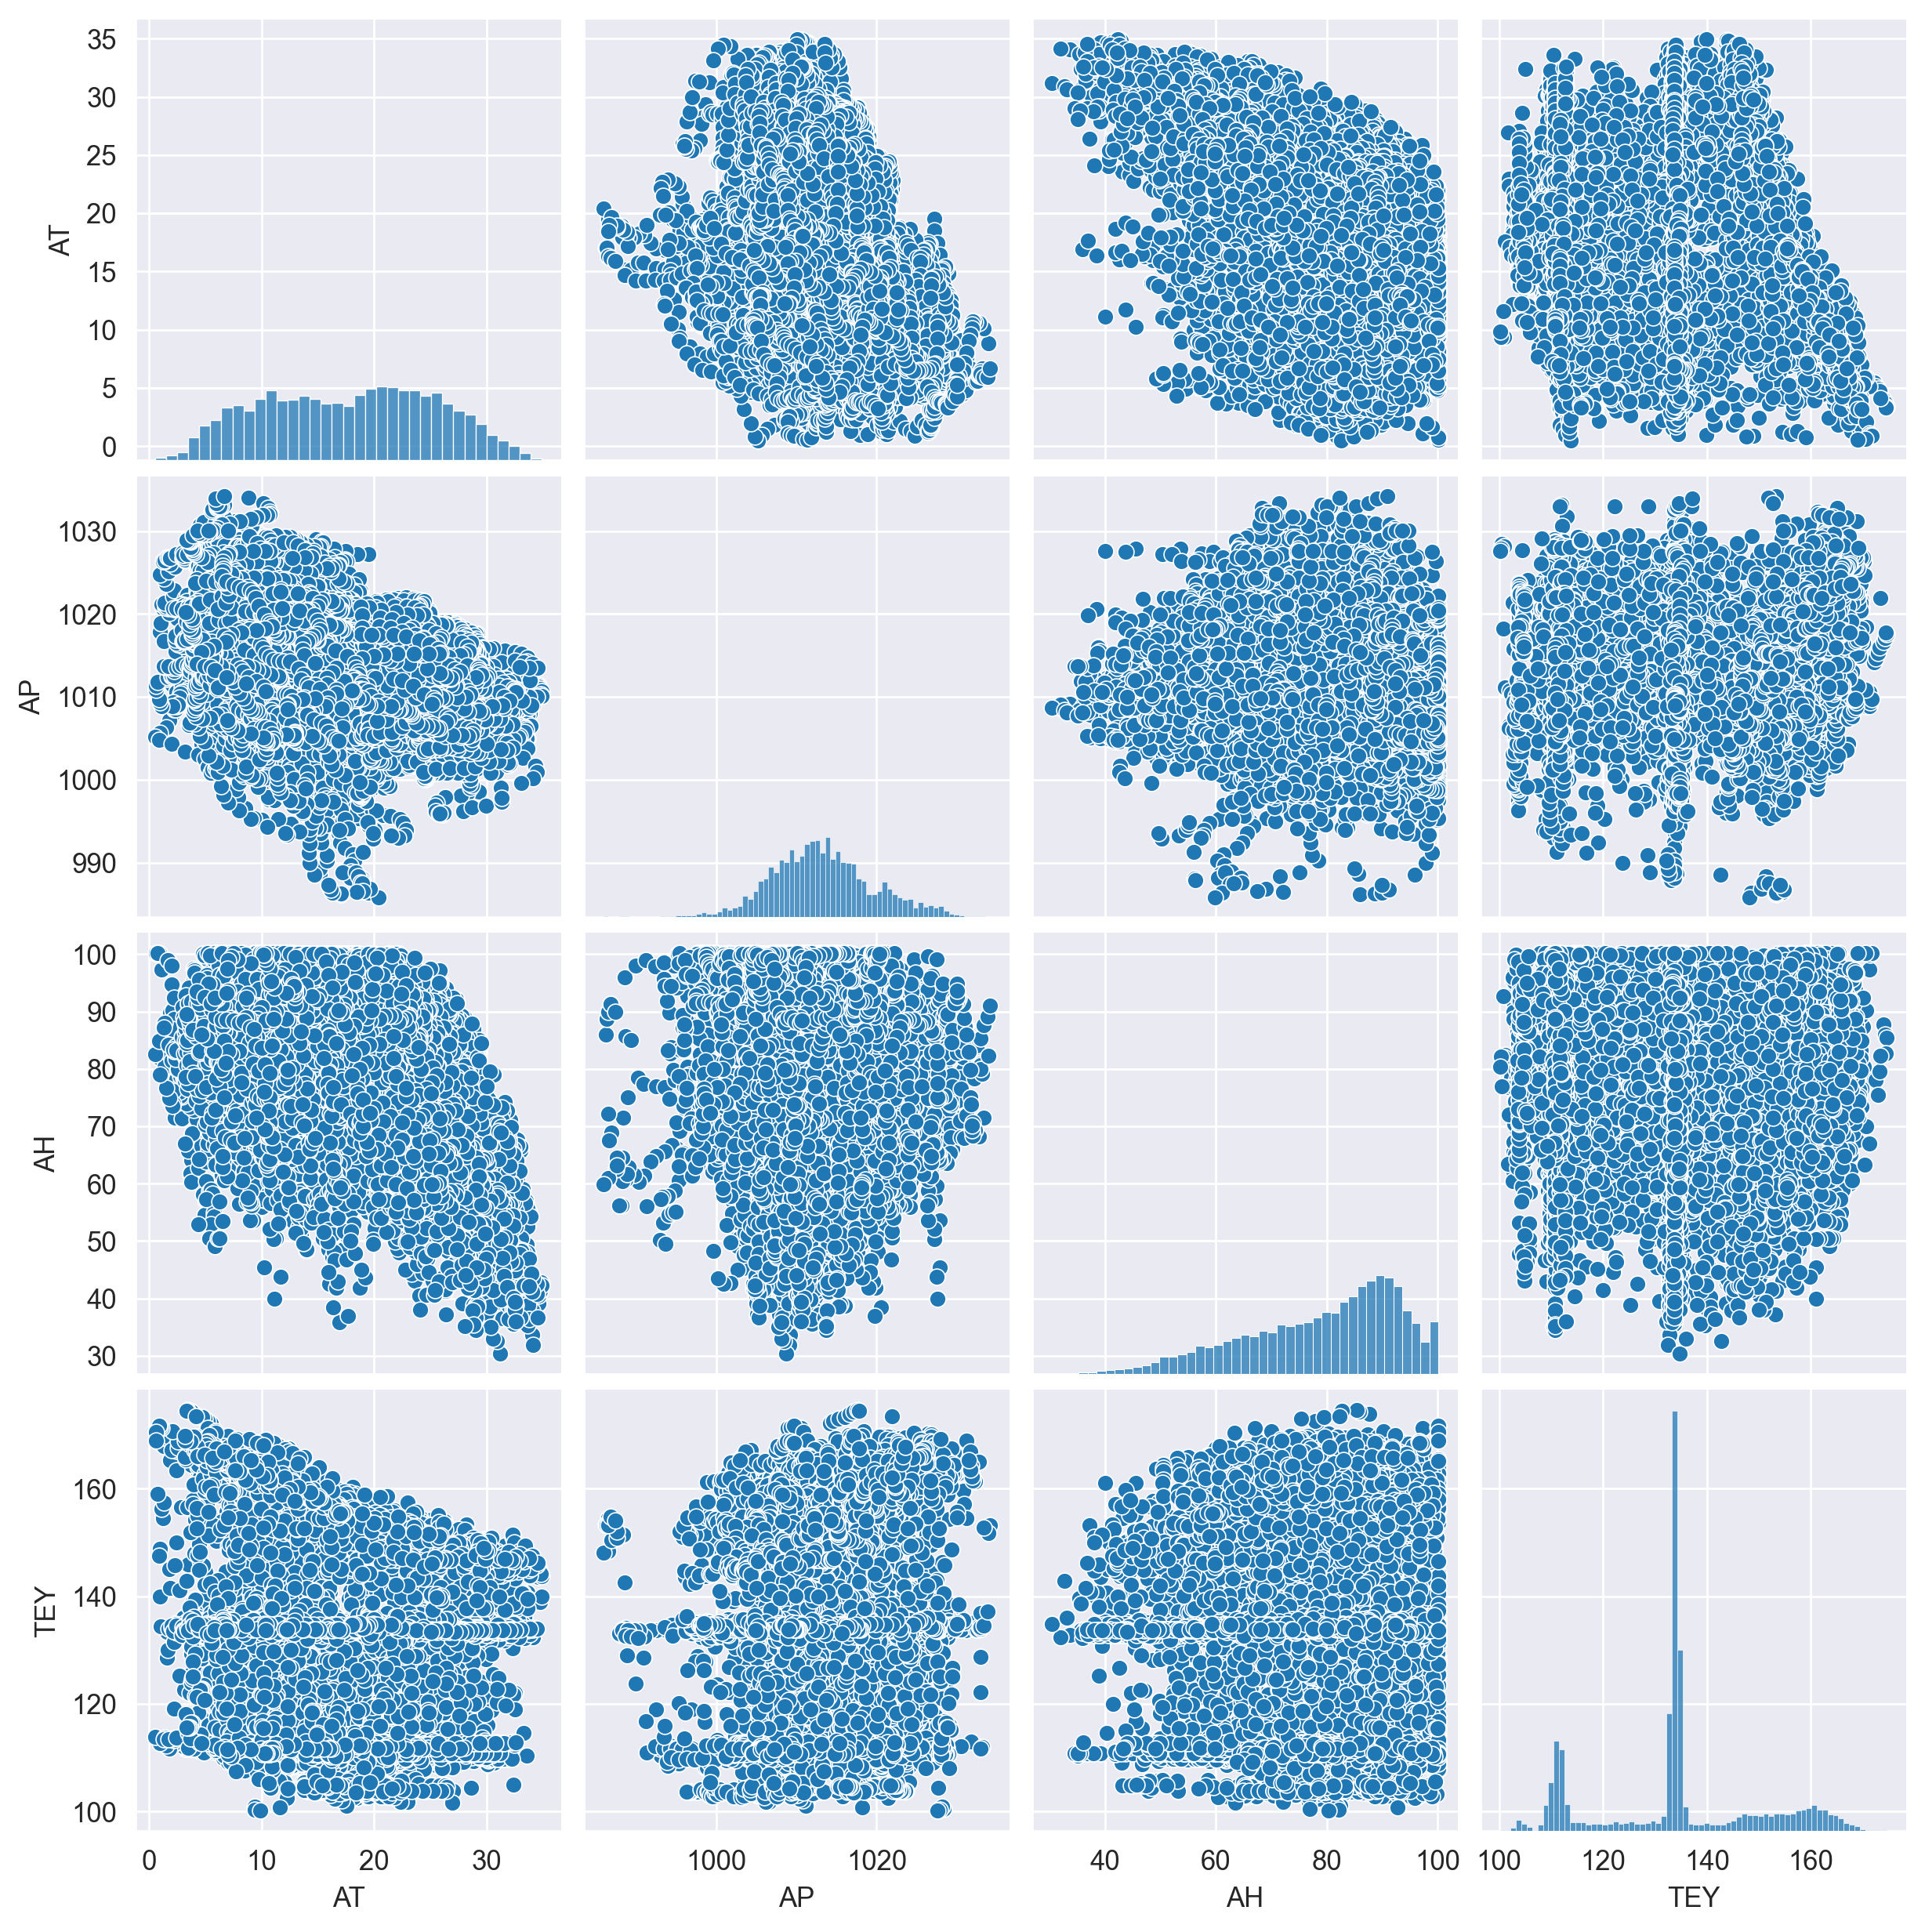

In [14]:
sns.pairplot(gt)

plt.show()

<AxesSubplot:>

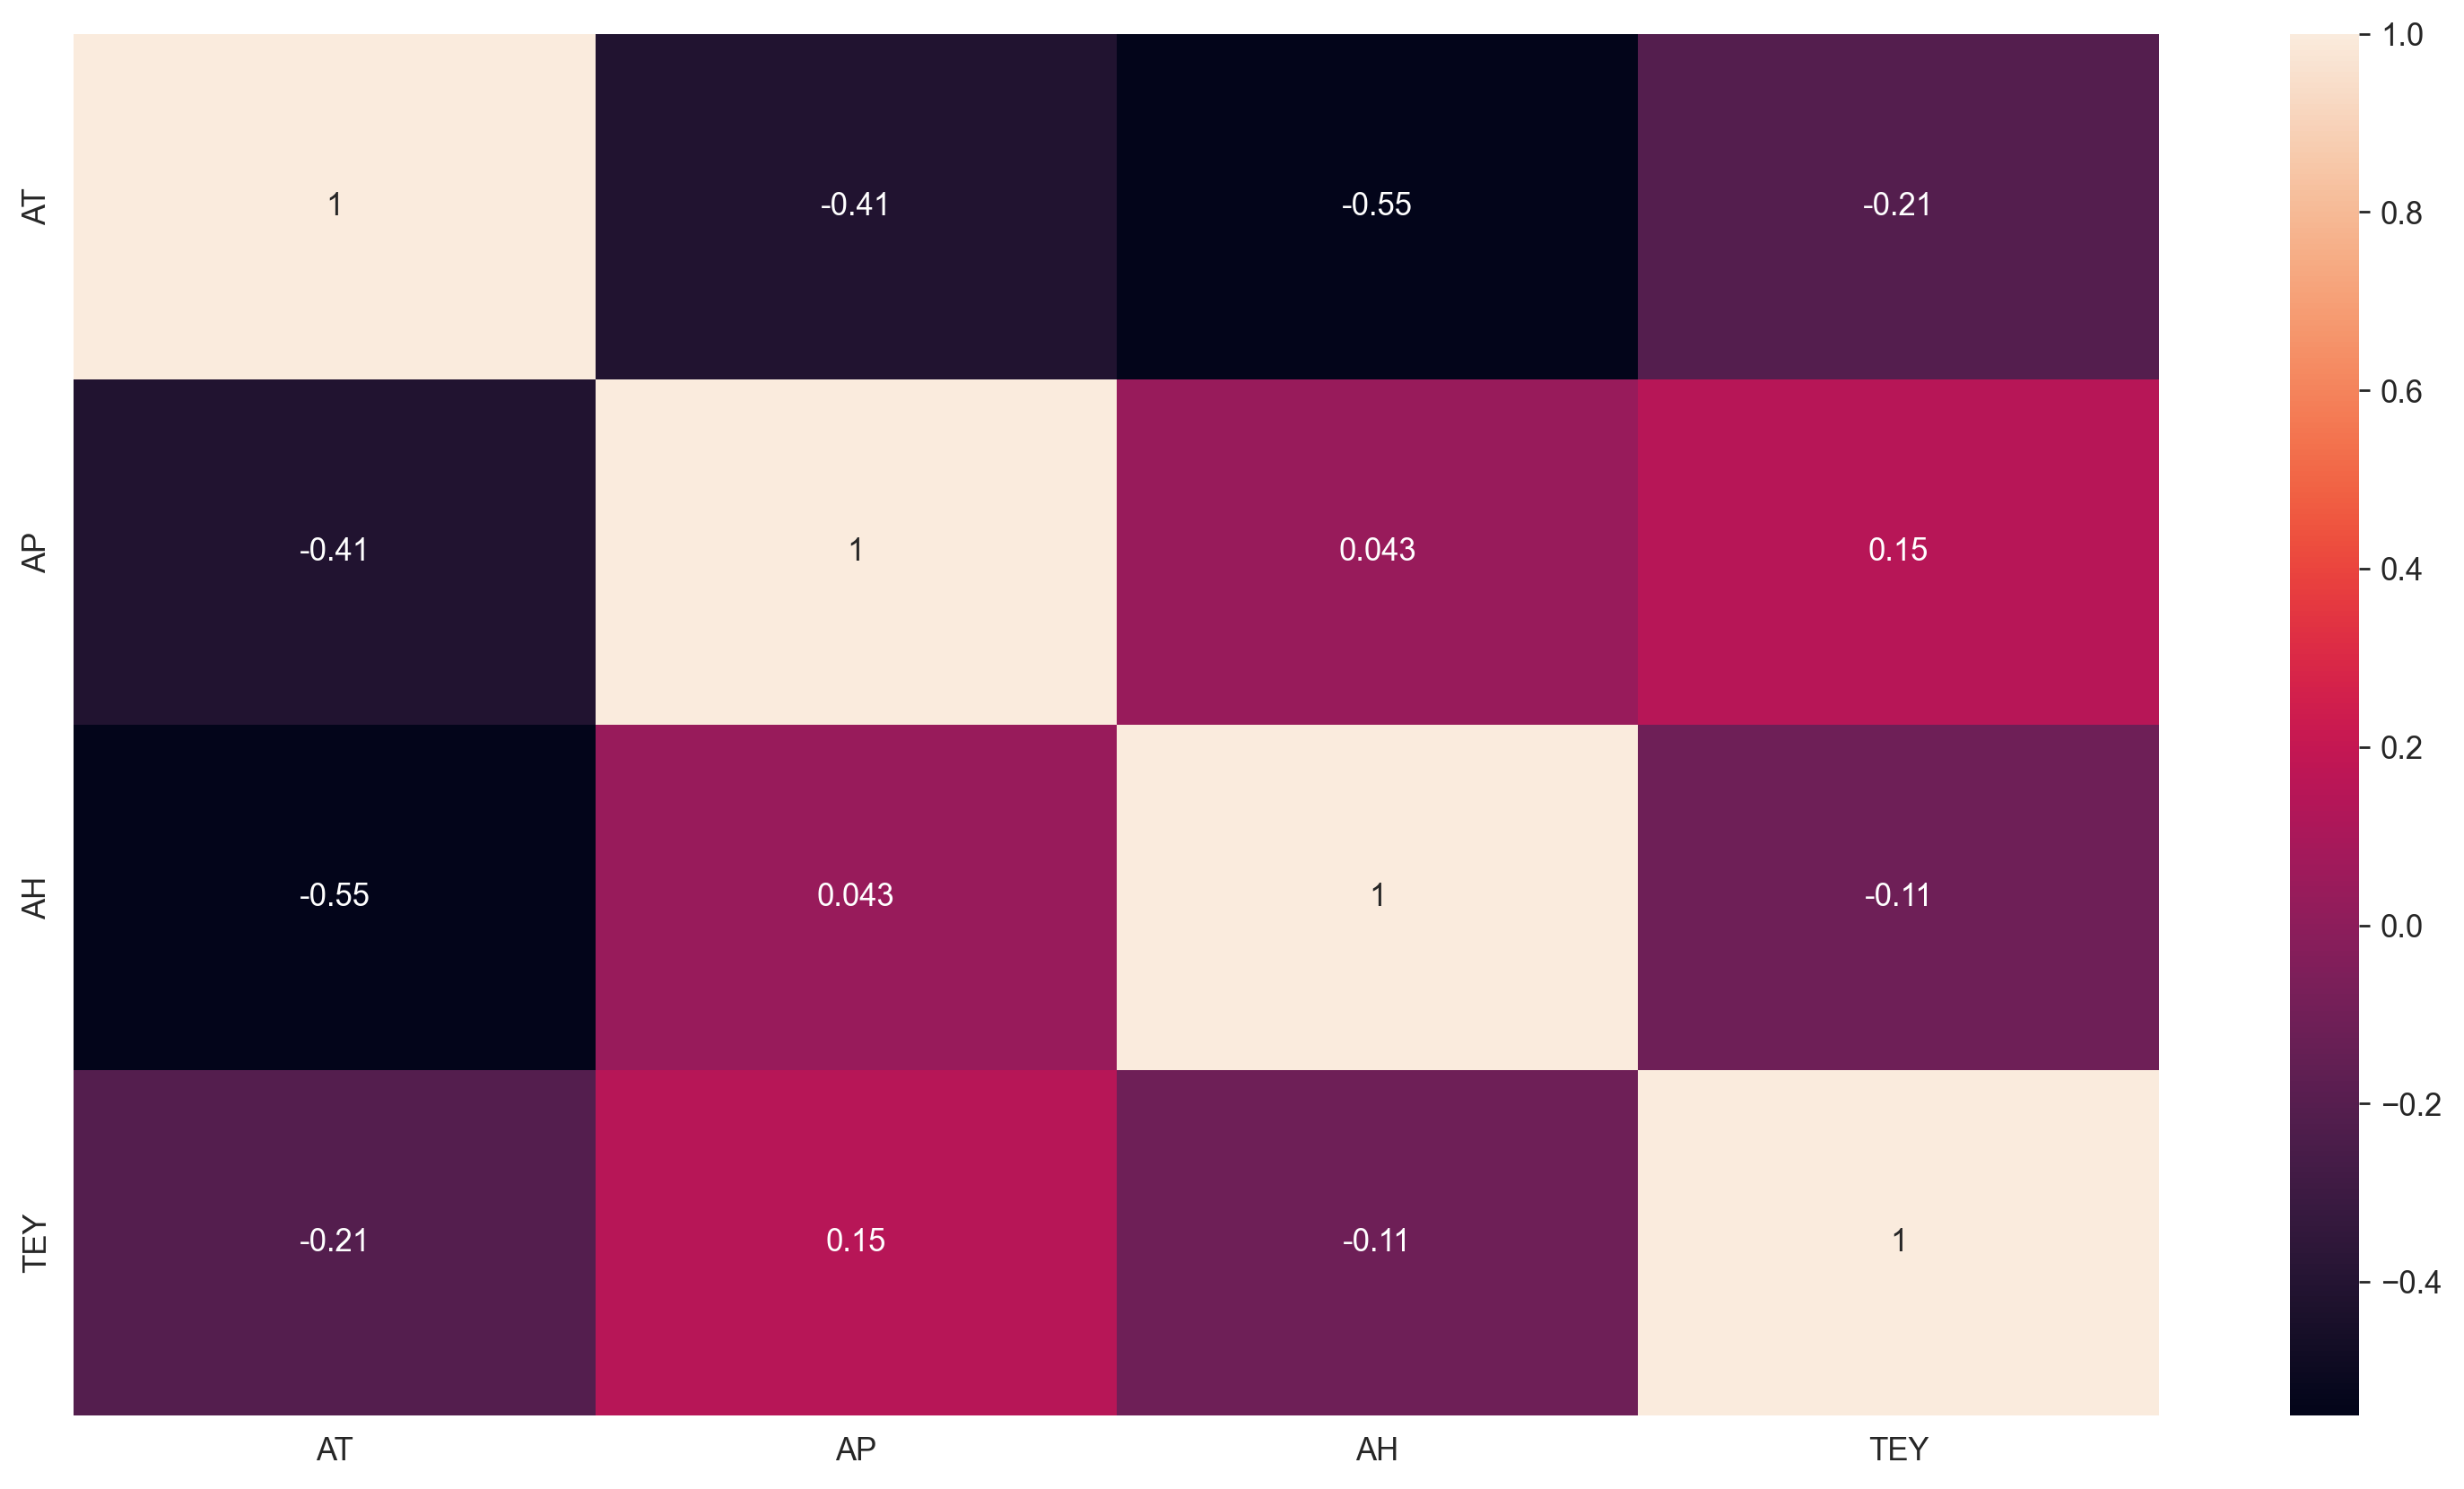

In [15]:
sns.heatmap(gt.corr(), annot = True)

# Outlier Detection

In [ ]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')

In [17]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)

In [18]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]


In [19]:
#Outlier Percentage (Before)

In [20]:
outlier_percentage(gt)

AT : 0.0 %
AP : 1.4229669525899329 %
AH : 0.37236518385530953 %
TEY : 10.08710685550901 %


We don't remove outlier in Target Column.

# Splitting The Data Into Target and Independent set

In [21]:
x = gt.iloc[:,:-1]
y = gt['TEY']

In [22]:
x

AT      AP      AH
0      6.8594  1007.9  96.799
1      6.7850  1008.4  97.118
2      6.8977  1008.8  95.939
3      7.0569  1009.2  95.249
4      7.3978  1009.7  95.150
...       ...     ...     ...
15034  9.0301  1005.6  98.460
15035  7.8879  1005.9  99.093
15036  7.2647  1006.3  99.496
15037  7.0060  1006.8  99.008
15038  6.9279  1007.2  97.533

[15039 rows x 3 columns]

# Normalizing The Dataset

In [23]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [24]:
scaled_x

AT        AP        AH
0     -1.439778 -0.826644  1.281436
1     -1.449601 -0.748647  1.304564
2     -1.434721 -0.686250  1.219086
3     -1.413702 -0.623853  1.169060
4     -1.368693 -0.545857  1.161883
...         ...       ...       ...
15034 -1.153182 -1.185428  1.401860
15035 -1.303986 -1.138630  1.447753
15036 -1.386267 -1.076233  1.476971
15037 -1.420423 -0.998236  1.441590
15038 -1.430734 -0.935839  1.334652

[15039 rows x 3 columns]

# Splitting The Data Into Training And Testing Set

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,train_size=0.75,random_state=1)

In [26]:
xtrain

AT        AP        AH
8033  -1.214338  0.452498  0.951776
6802  -1.051400  1.294860  0.572670
11267  0.230737  0.733285  1.248231
5411  -0.154657  0.343303  0.421869
13194  0.769285 -0.218272  0.674968
...         ...       ...       ...
905   -1.811256  1.326058  0.135129
5192   0.640952 -0.748647 -0.064901
12172  1.728346 -1.060633 -1.773306
235   -1.375374  0.951675 -0.112606
13349  0.513808  0.109314  0.897038

[11279 rows x 3 columns]

# Preparing Model

In [27]:
#Creating Default Model With ANN

In [28]:
ann_def =Sequential()

In [29]:
#Creating Hidden Layer

In [30]:
ann_def.add(Dense(units=30, activation='linear'))
ann_def.add(Dense(units=20, activation='relu'))

In [31]:
#Creating Output Layer

In [32]:
ann_def.add(Dense(units=1))

In [33]:
#Connecting All Neurons In Each Laye

In [34]:
ann_def.compile(optimizer='adam', loss='mse')

In [35]:
#Fitting Data

In [36]:
ann_def.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 50)

Epoch 1/50
353/353 [==============================] - 2s 2ms/step - loss: 12936.6475 - val_loss: 5533.7407
Epoch 2/50
353/353 [==============================] - 1s 2ms/step - loss: 3188.7371 - val_loss: 1336.5328
Epoch 3/50
353/353 [==============================] - 1s 2ms/step - loss: 610.4302 - val_loss: 279.2121
Epoch 4/50
353/353 [==============================] - 1s 2ms/step - loss: 242.2572 - val_loss: 241.1748
Epoch 5/50
353/353 [==============================] - 1s 2ms/step - loss: 225.2389 - val_loss: 232.7108
Epoch 6/50
353/353 [==============================] - 1s 2ms/step - loss: 219.9745 - val_loss: 227.9829
Epoch 7/50
353/353 [==============================] - 1s 2ms/step - loss: 216.8011 - val_loss: 225.1820
Epoch 8/50
353/353 [==============================] - 1s 2ms/step - loss: 215.3919 - val_loss: 223.5342
Epoch 9/50
353/353 [==============================] - 1s 2ms/step - loss: 214.5661 - val_loss: 223.5303
Epoch 10/50
353/353 [==============================] - 1s 2

# Evaluating The Model

In [37]:
#Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

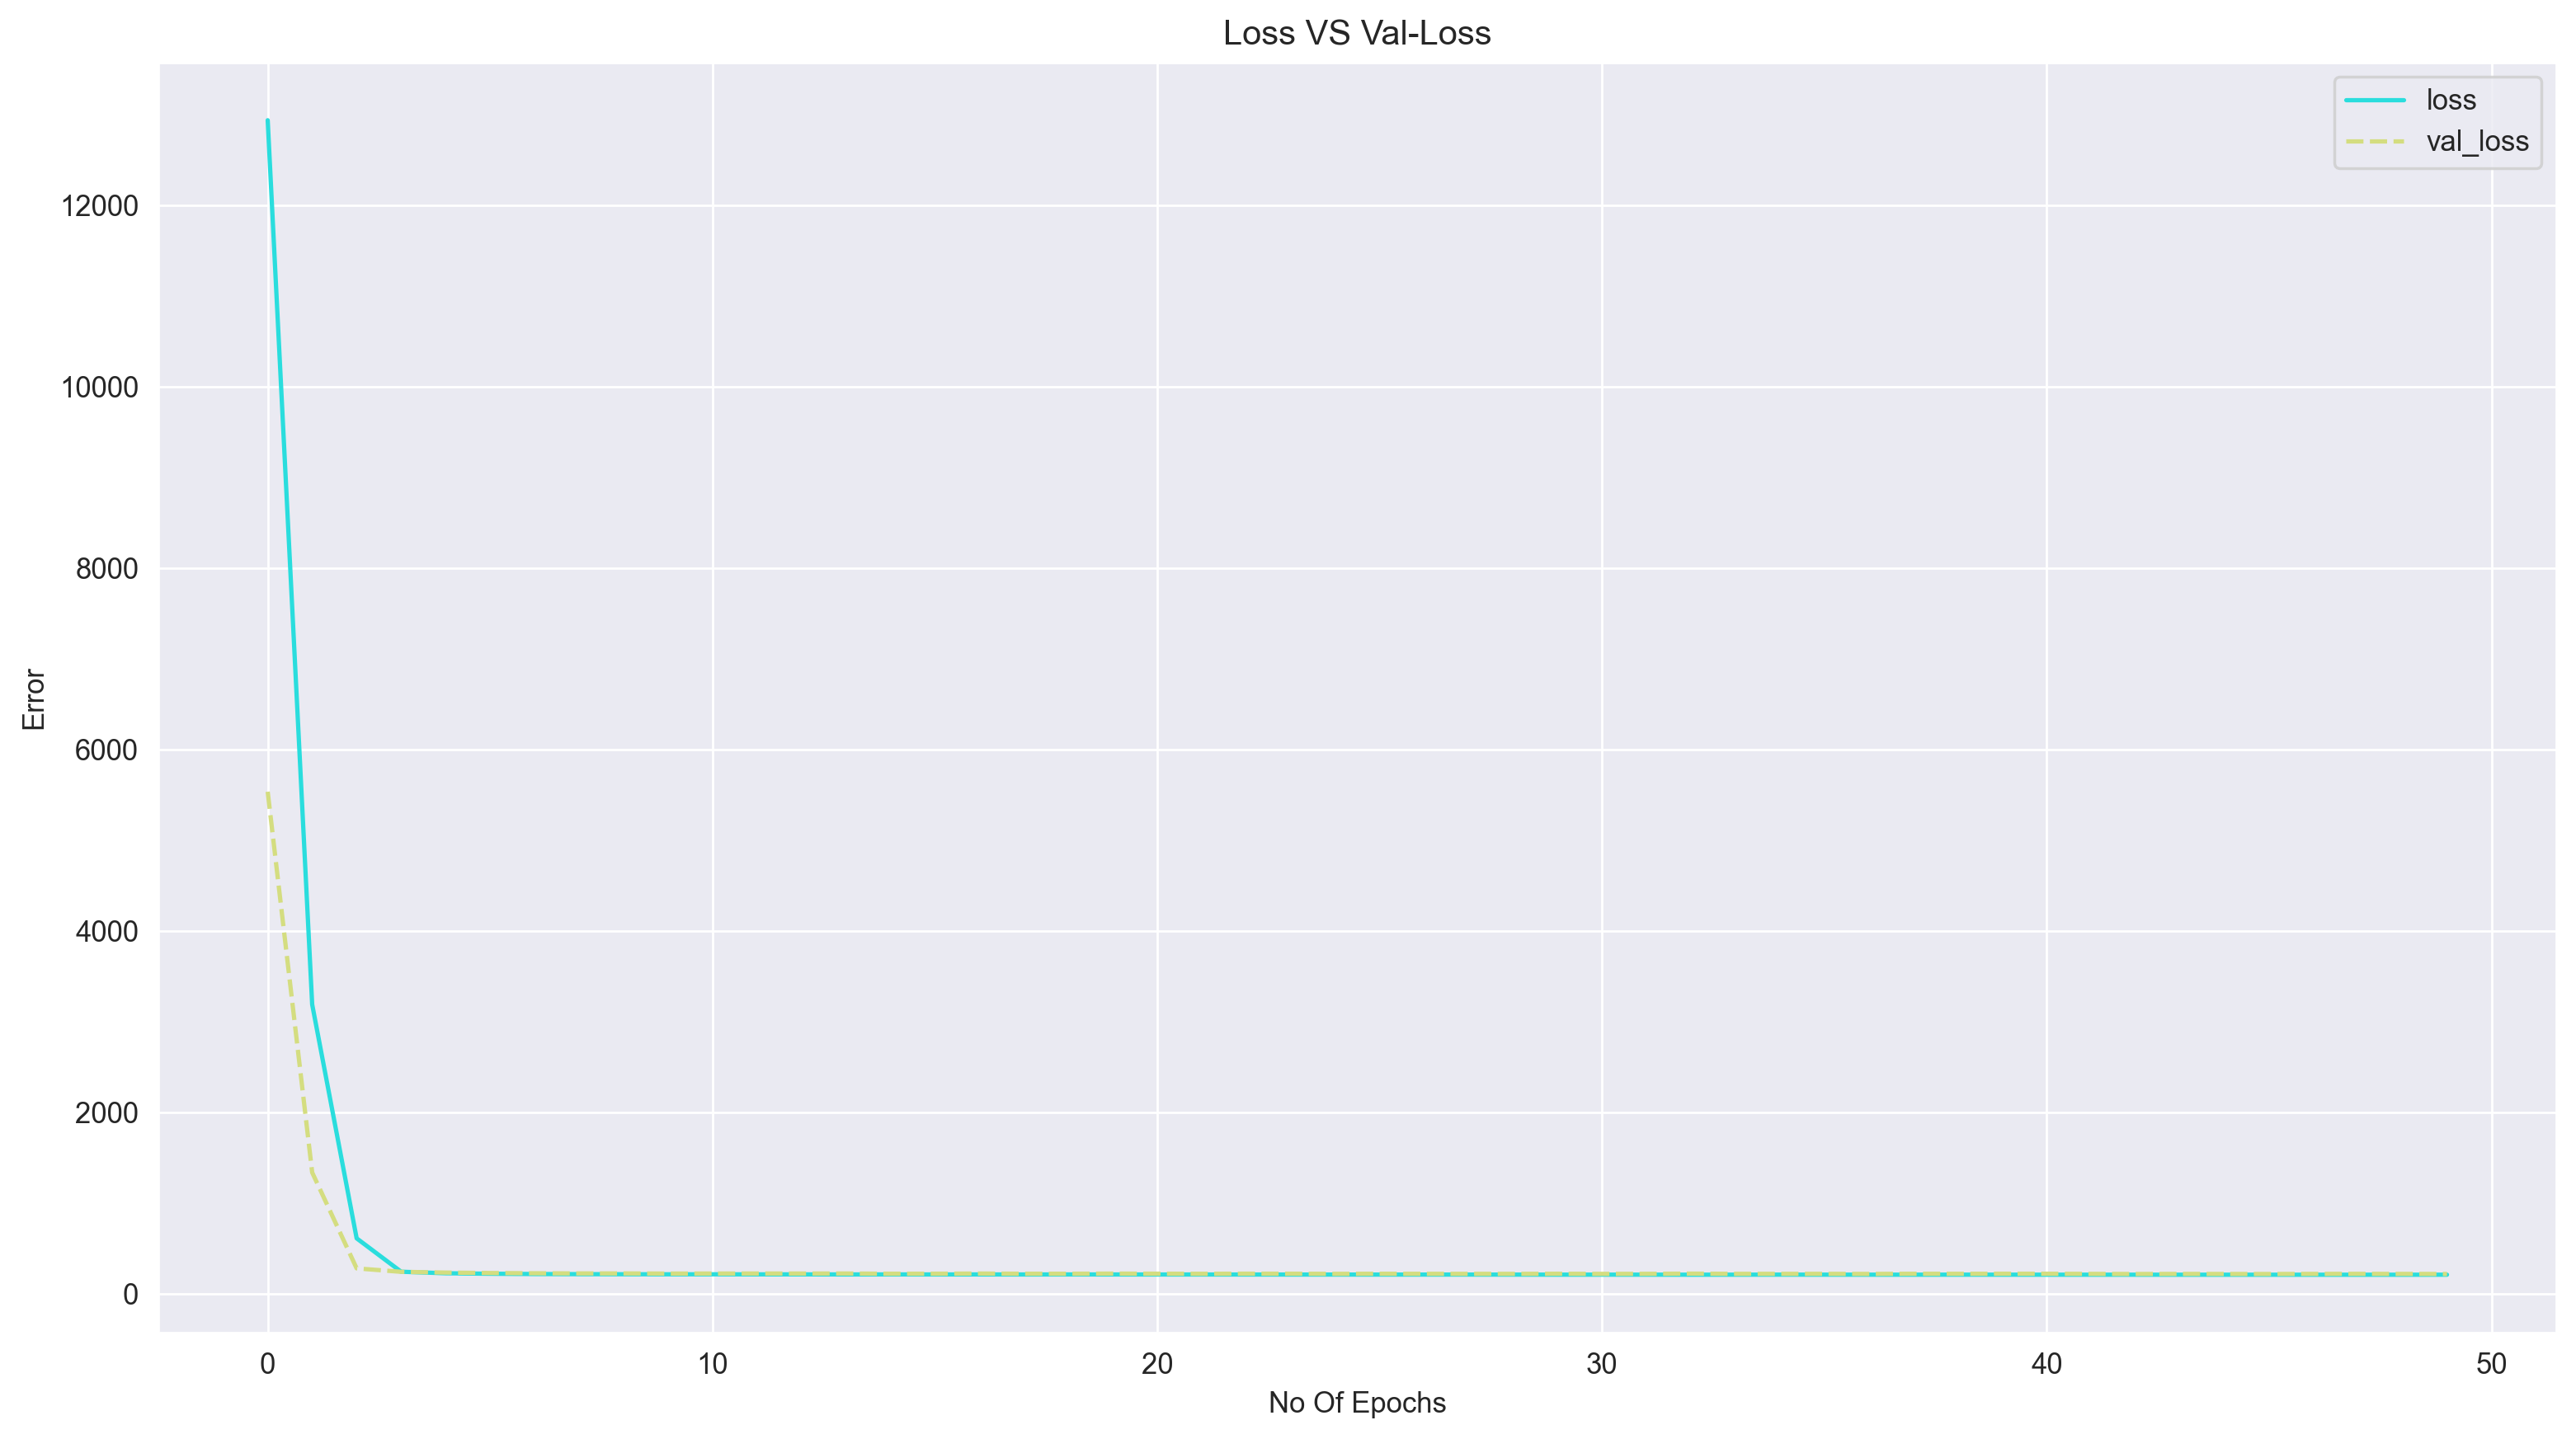

In [38]:
val_loss_def = pd.DataFrame(ann_def.history.history)

sns.lineplot(data = val_loss_def, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

# Creating Model With Early Stopping

In [39]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [40]:
ann_es =Sequential()

In [41]:
#Creating Hidden Layer

In [42]:
ann_es.add(Dense(units=30, activation='linear'))
ann_es.add(Dense(units=20, activation='relu'))

In [43]:
#Creating Output Layer

In [44]:
ann_es.add(Dense(units=1))

In [45]:
#Connecting All Neurons In Each Layer

In [46]:
ann_es.compile(optimizer='adam', loss='mse')

In [47]:
#Fitting Data

In [48]:
ann_es.fit(xtrain, ytrain, validation_data = (xtest, ytest), callbacks=[early] , epochs = 100)

Epoch 1/100
353/353 [==============================] - 1s 2ms/step - loss: 13270.8135 - val_loss: 5312.6138
Epoch 2/100
353/353 [==============================] - 1s 2ms/step - loss: 2961.3066 - val_loss: 1107.0323
Epoch 3/100
353/353 [==============================] - 1s 2ms/step - loss: 488.0314 - val_loss: 261.6015
Epoch 4/100
353/353 [==============================] - 1s 2ms/step - loss: 233.6228 - val_loss: 234.7786
Epoch 5/100
353/353 [==============================] - 1s 2ms/step - loss: 221.5391 - val_loss: 227.3378
Epoch 6/100
353/353 [==============================] - 1s 2ms/step - loss: 218.0047 - val_loss: 226.4594
Epoch 7/100
353/353 [==============================] - 1s 2ms/step - loss: 216.7820 - val_loss: 226.1213
Epoch 8/100
353/353 [==============================] - 1s 2ms/step - loss: 216.3638 - val_loss: 224.6786
Epoch 9/100
353/353 [==============================] - 1s 2ms/step - loss: 215.7217 - val_loss: 224.9067
Epoch 10/100
353/353 [============================

353/353 [==============================] - 1s 2ms/step - loss: 209.7809 - val_loss: 217.8165
Epoch 79/100
353/353 [==============================] - 1s 2ms/step - loss: 209.8091 - val_loss: 219.9608
Epoch 80/100
353/353 [==============================] - 1s 2ms/step - loss: 209.9369 - val_loss: 219.1351
Epoch 81/100
353/353 [==============================] - 1s 2ms/step - loss: 209.7450 - val_loss: 217.3045
Epoch 82/100
353/353 [==============================] - 1s 2ms/step - loss: 209.7759 - val_loss: 218.4599
Epoch 83/100
353/353 [==============================] - 1s 2ms/step - loss: 210.2065 - val_loss: 220.8422
Epoch 84/100
353/353 [==============================] - 1s 2ms/step - loss: 209.6982 - val_loss: 218.6924
Epoch 85/100
353/353 [==============================] - 1s 2ms/step - loss: 209.5073 - val_loss: 219.8362
Epoch 86/100
353/353 [==============================] - 1s 2ms/step - loss: 209.8520 - val_loss: 220.1326
Epoch 87/100
353/353 [==============================] - 1s 

# Evaluating The Model

In [49]:
#Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

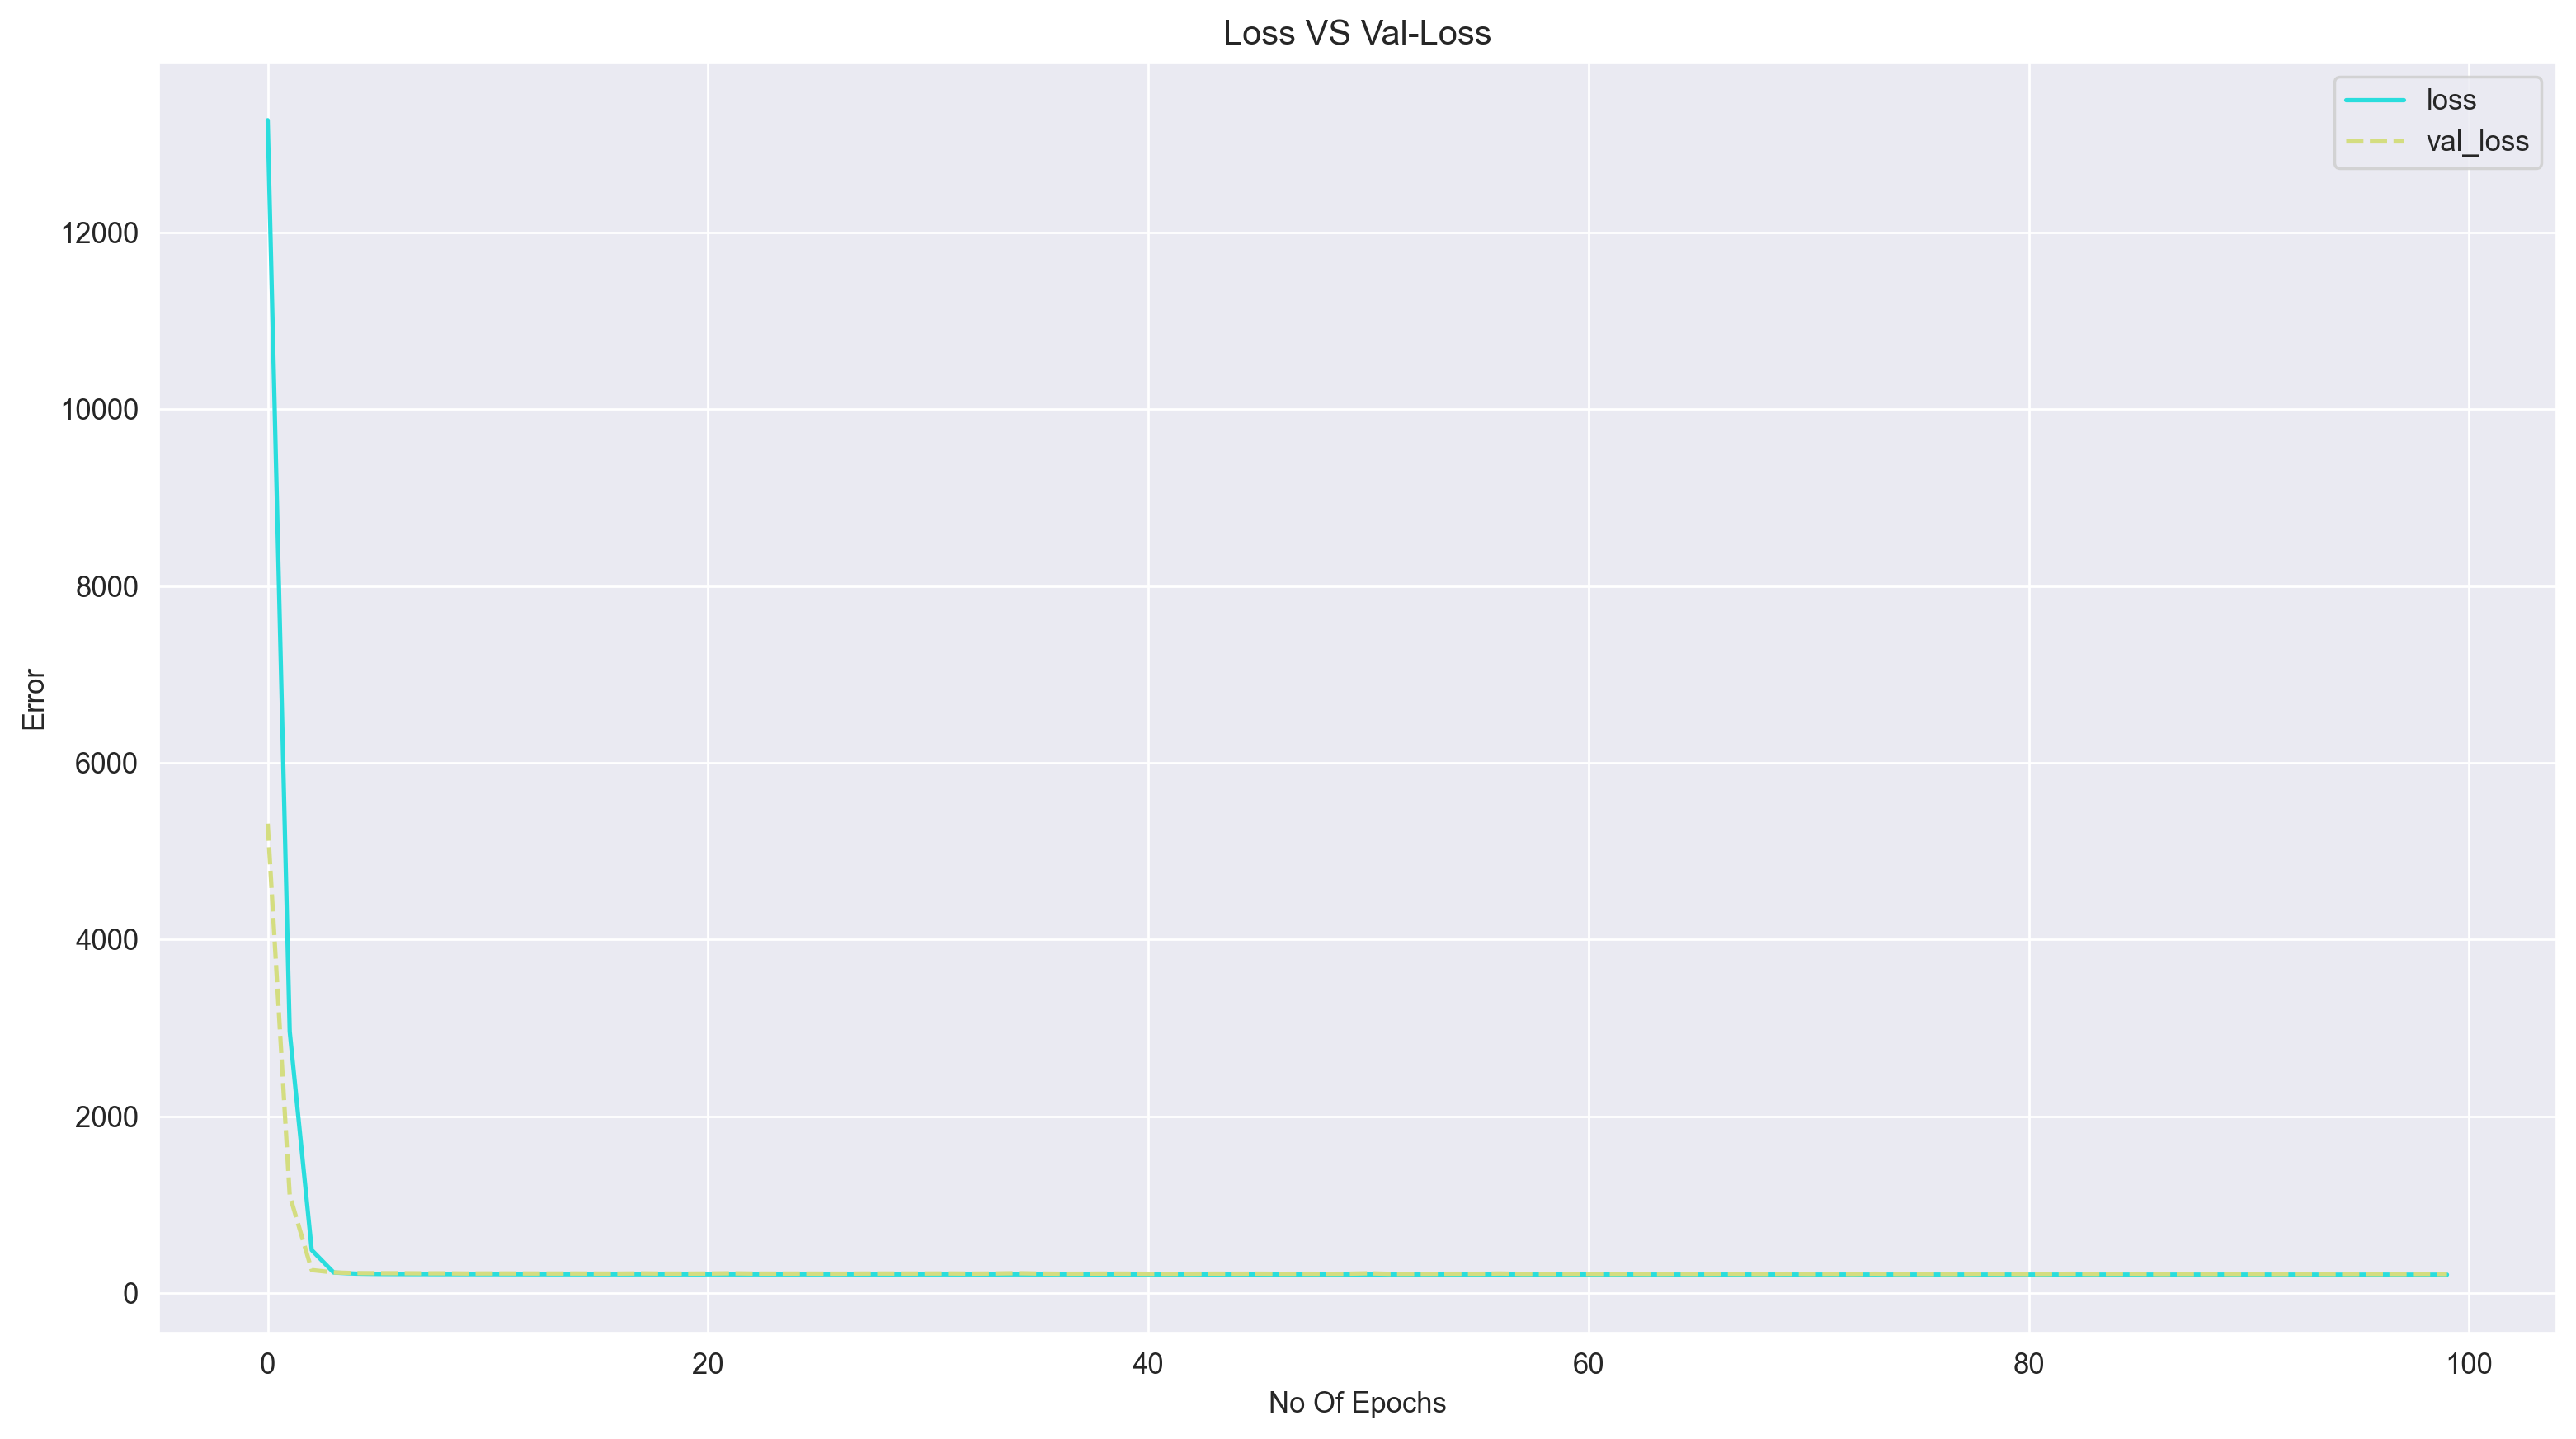

In [50]:
val_loss_es = pd.DataFrame(ann_es.history.history)

sns.lineplot(data = val_loss_es, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

# Creating Model With Drop Out Layer

In [51]:
ann_dol =Sequential()

In [52]:
#Creating Hidden Layer

In [53]:
ann_dol.add(Dense(units=30, activation='linear'))
ann_dol.add(Dropout(rate=0.5))

ann_dol.add(Dense(units=20, activation='relu'))
ann_dol.add(Dropout(rate=0.5))

In [54]:
#Creating Output Layer

In [55]:
ann_dol.add(Dense(units=1))

In [56]:
#Connecting All Neurons In Each Layer

In [57]:
ann_dol.compile(optimizer='adam', loss='mse')

In [58]:
#Fitting Data

In [59]:
ann_dol.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 50)

Epoch 1/50
353/353 [==============================] - 2s 3ms/step - loss: 14721.9404 - val_loss: 8286.5107
Epoch 2/50
353/353 [==============================] - 1s 2ms/step - loss: 5309.1890 - val_loss: 1259.1166
Epoch 3/50
353/353 [==============================] - 1s 2ms/step - loss: 3018.9321 - val_loss: 593.6406
Epoch 4/50
353/353 [==============================] - 1s 2ms/step - loss: 2406.6060 - val_loss: 395.2268
Epoch 5/50
353/353 [==============================] - 1s 2ms/step - loss: 2160.4873 - val_loss: 404.0809
Epoch 6/50
353/353 [==============================] - 1s 3ms/step - loss: 1986.9233 - val_loss: 354.8478
Epoch 7/50
353/353 [==============================] - 1s 3ms/step - loss: 1856.8772 - val_loss: 358.9607
Epoch 8/50
353/353 [==============================] - 1s 2ms/step - loss: 1770.1362 - val_loss: 350.8344
Epoch 9/50
353/353 [==============================] - 1s 2ms/step - loss: 1722.1917 - val_loss: 381.7765
Epoch 10/50
353/353 [==============================]

# Evaluating The Model

In [60]:
#Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

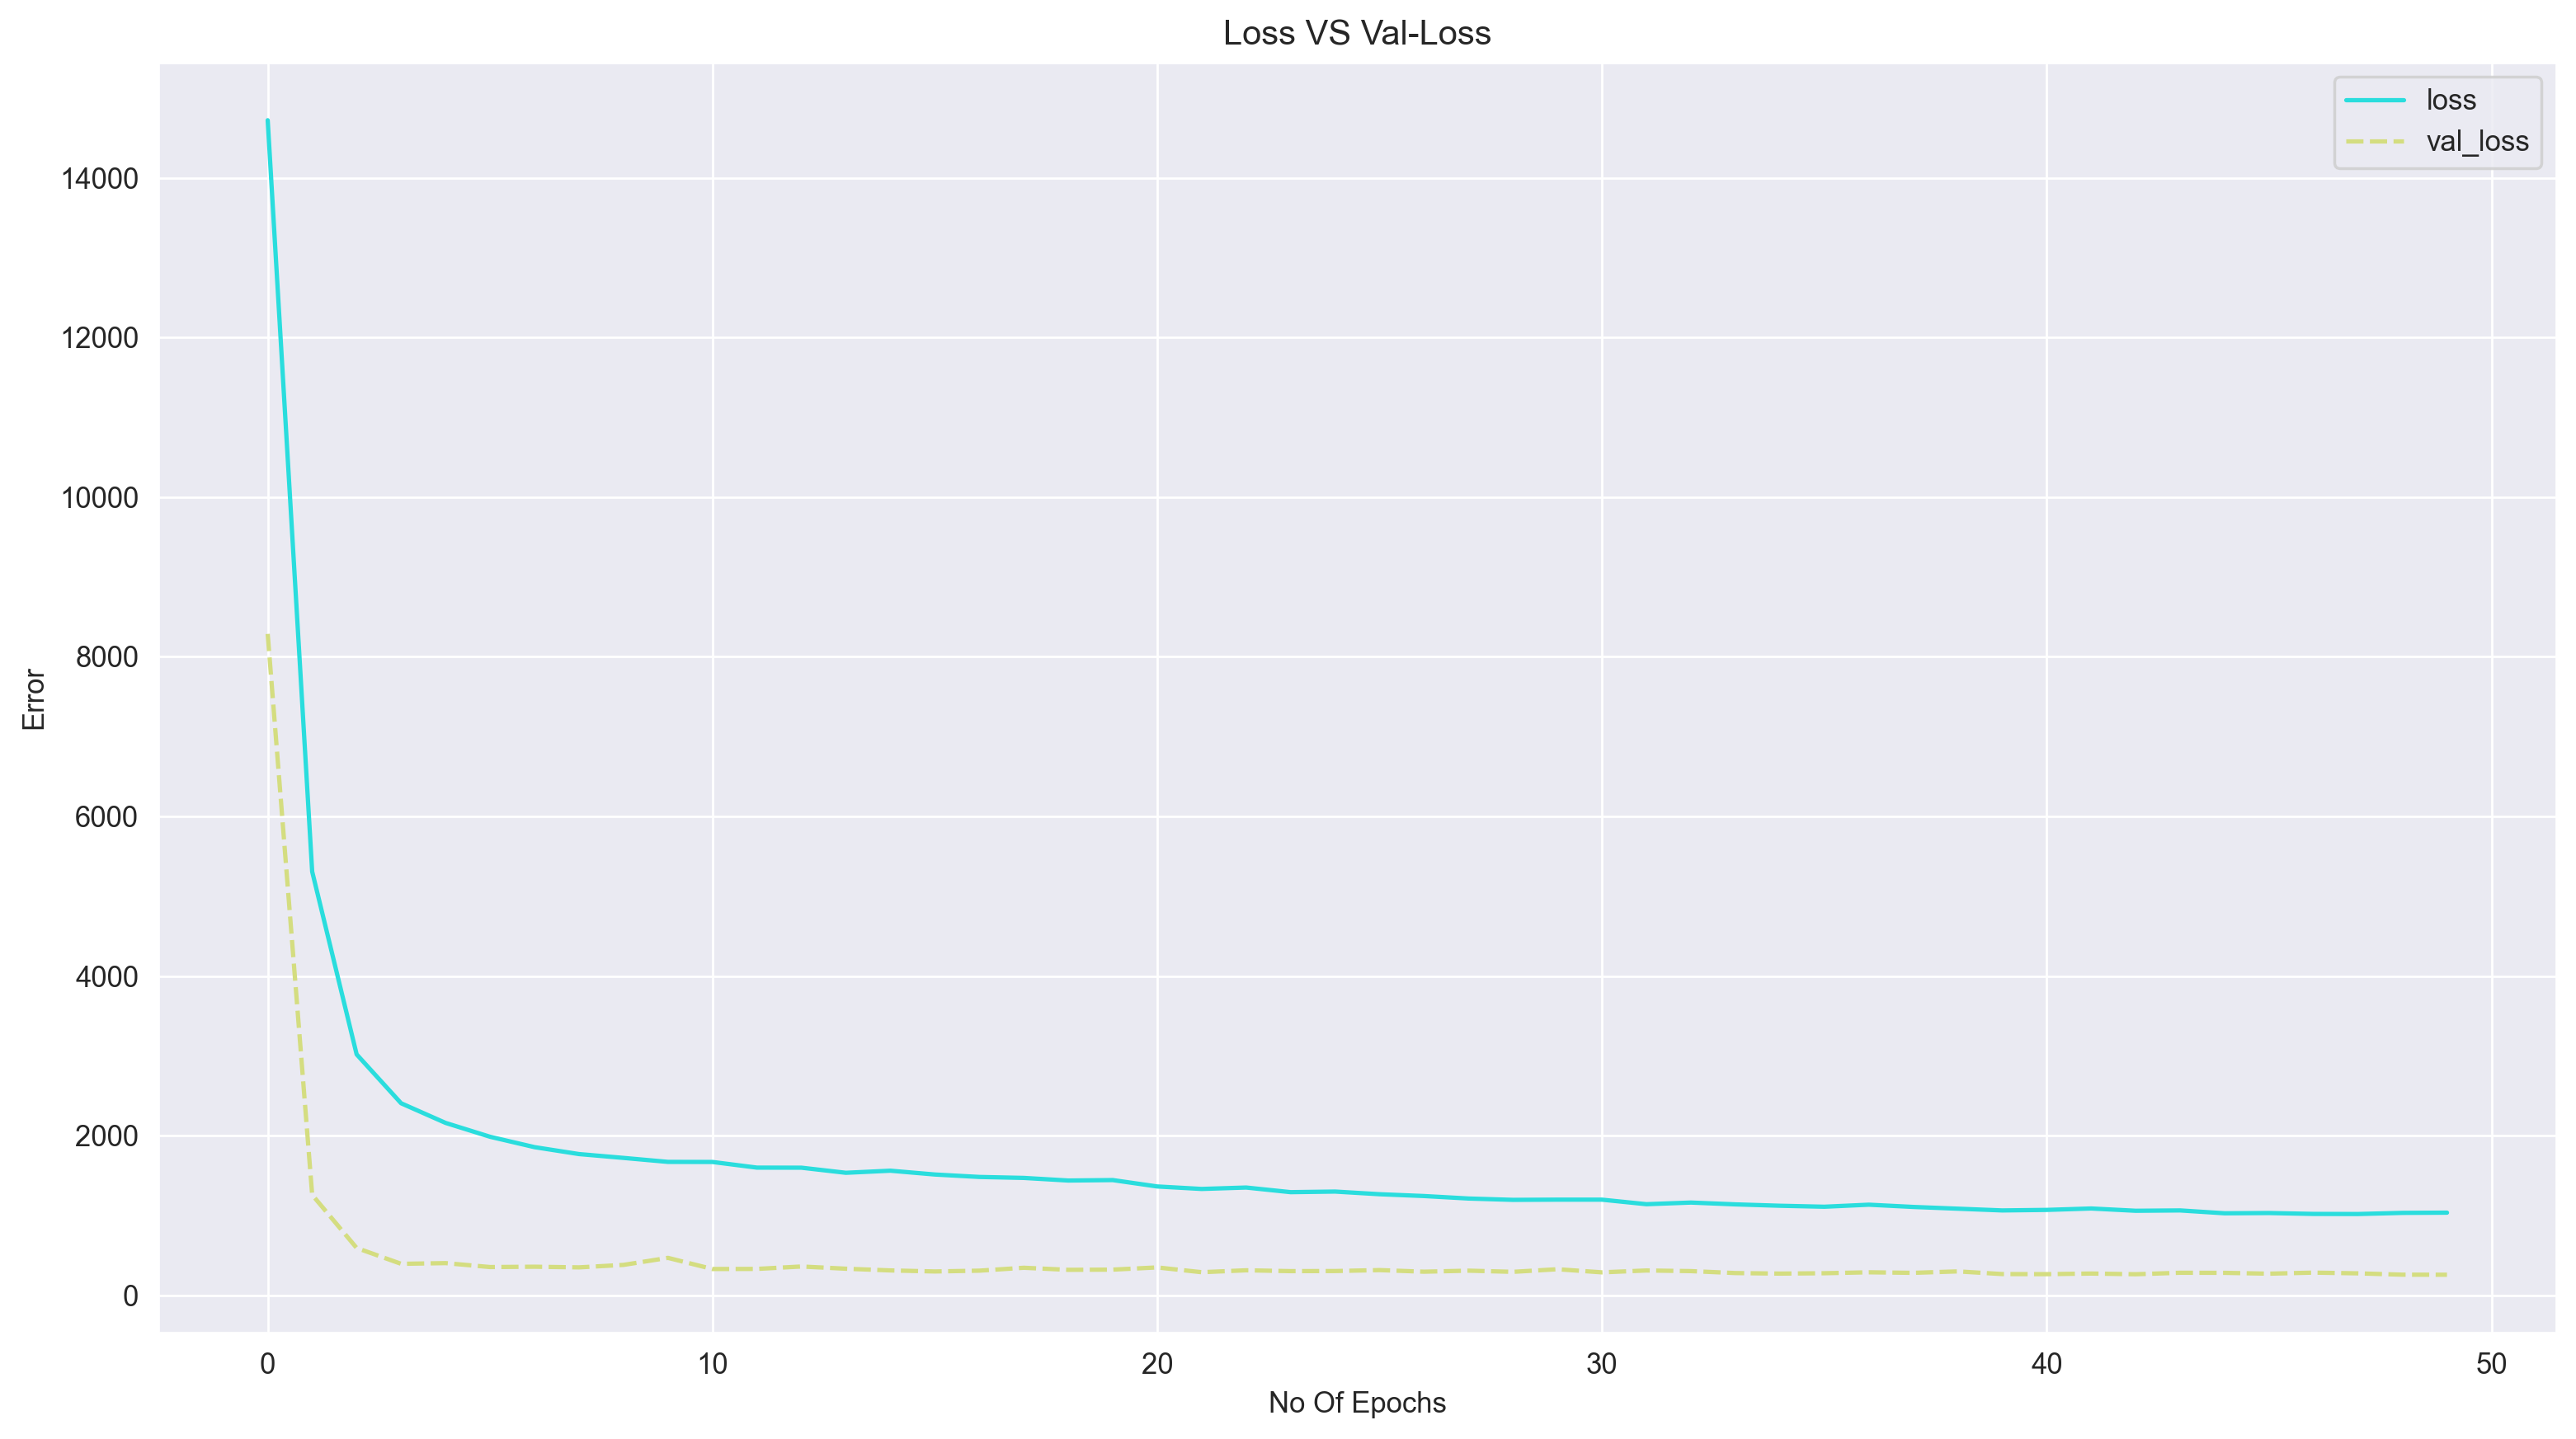

In [61]:
val_loss_dol = pd.DataFrame(ann_dol.history.history)

sns.lineplot(data = val_loss_dol, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

# Creating Model With Early Stopping And Drop Out Layer

In [62]:
#Creating ann Model

In [63]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [64]:
ann_all =Sequential()

In [65]:
#Creating Hidden Layer

In [66]:
ann_all.add(Dense(units=30, activation='linear'))
ann_all.add(Dropout(rate=0.5))

ann_all.add(Dense(units=20, activation='relu'))
ann_all.add(Dropout(rate=0.5))

In [67]:
#Creating Output Layer

In [68]:
ann_all.add(Dense(units=1))

In [69]:
#Connecting All Neurons In Each Layer

In [71]:
ann_all.compile(optimizer='adam', loss='mse')

In [72]:
#Fitting Data

In [73]:
ann_all.fit(xtrain, ytrain, validation_data = (xtest, ytest), callbacks=[early] , epochs = 100)

Epoch 1/100
353/353 [==============================] - 2s 3ms/step - loss: 14772.0176 - val_loss: 7184.1729
Epoch 2/100
353/353 [==============================] - 1s 3ms/step - loss: 3670.3193 - val_loss: 574.4899
Epoch 3/100
353/353 [==============================] - 1s 3ms/step - loss: 2472.7224 - val_loss: 477.2993
Epoch 4/100
353/353 [==============================] - 1s 2ms/step - loss: 2222.1897 - val_loss: 383.5577
Epoch 5/100
353/353 [==============================] - 1s 2ms/step - loss: 2104.2417 - val_loss: 363.6390
Epoch 6/100
353/353 [==============================] - 1s 3ms/step - loss: 1923.0891 - val_loss: 395.5884
Epoch 7/100
353/353 [==============================] - 1s 2ms/step - loss: 1953.4001 - val_loss: 382.8552
Epoch 8/100
353/353 [==============================] - 1s 3ms/step - loss: 1857.9907 - val_loss: 372.7922
Epoch 9/100
353/353 [==============================] - 1s 3ms/step - loss: 1831.1859 - val_loss: 350.7428
Epoch 10/100
353/353 [======================

353/353 [==============================] - 1s 2ms/step - loss: 968.4396 - val_loss: 263.1281
Epoch 78/100
353/353 [==============================] - 1s 3ms/step - loss: 974.5322 - val_loss: 269.1312
Epoch 79/100
353/353 [==============================] - 1s 2ms/step - loss: 980.6574 - val_loss: 258.5201
Epoch 80/100
353/353 [==============================] - 1s 2ms/step - loss: 986.9643 - val_loss: 274.9361
Epoch 81/100
353/353 [==============================] - 1s 2ms/step - loss: 974.4127 - val_loss: 260.3762
Epoch 82/100
353/353 [==============================] - 1s 2ms/step - loss: 966.2164 - val_loss: 268.2539
Epoch 83/100
353/353 [==============================] - 1s 2ms/step - loss: 986.2664 - val_loss: 270.4821
Epoch 84/100
353/353 [==============================] - 1s 2ms/step - loss: 961.8682 - val_loss: 269.1845
Epoch 85/100
353/353 [==============================] - 1s 2ms/step - loss: 953.3167 - val_loss: 274.5009
Epoch 86/100
353/353 [==============================] - 1s 

# Evaluating The Model

In [74]:
#Ploting Line-Plot

Text(0.5, 0, 'No Of Epochs')

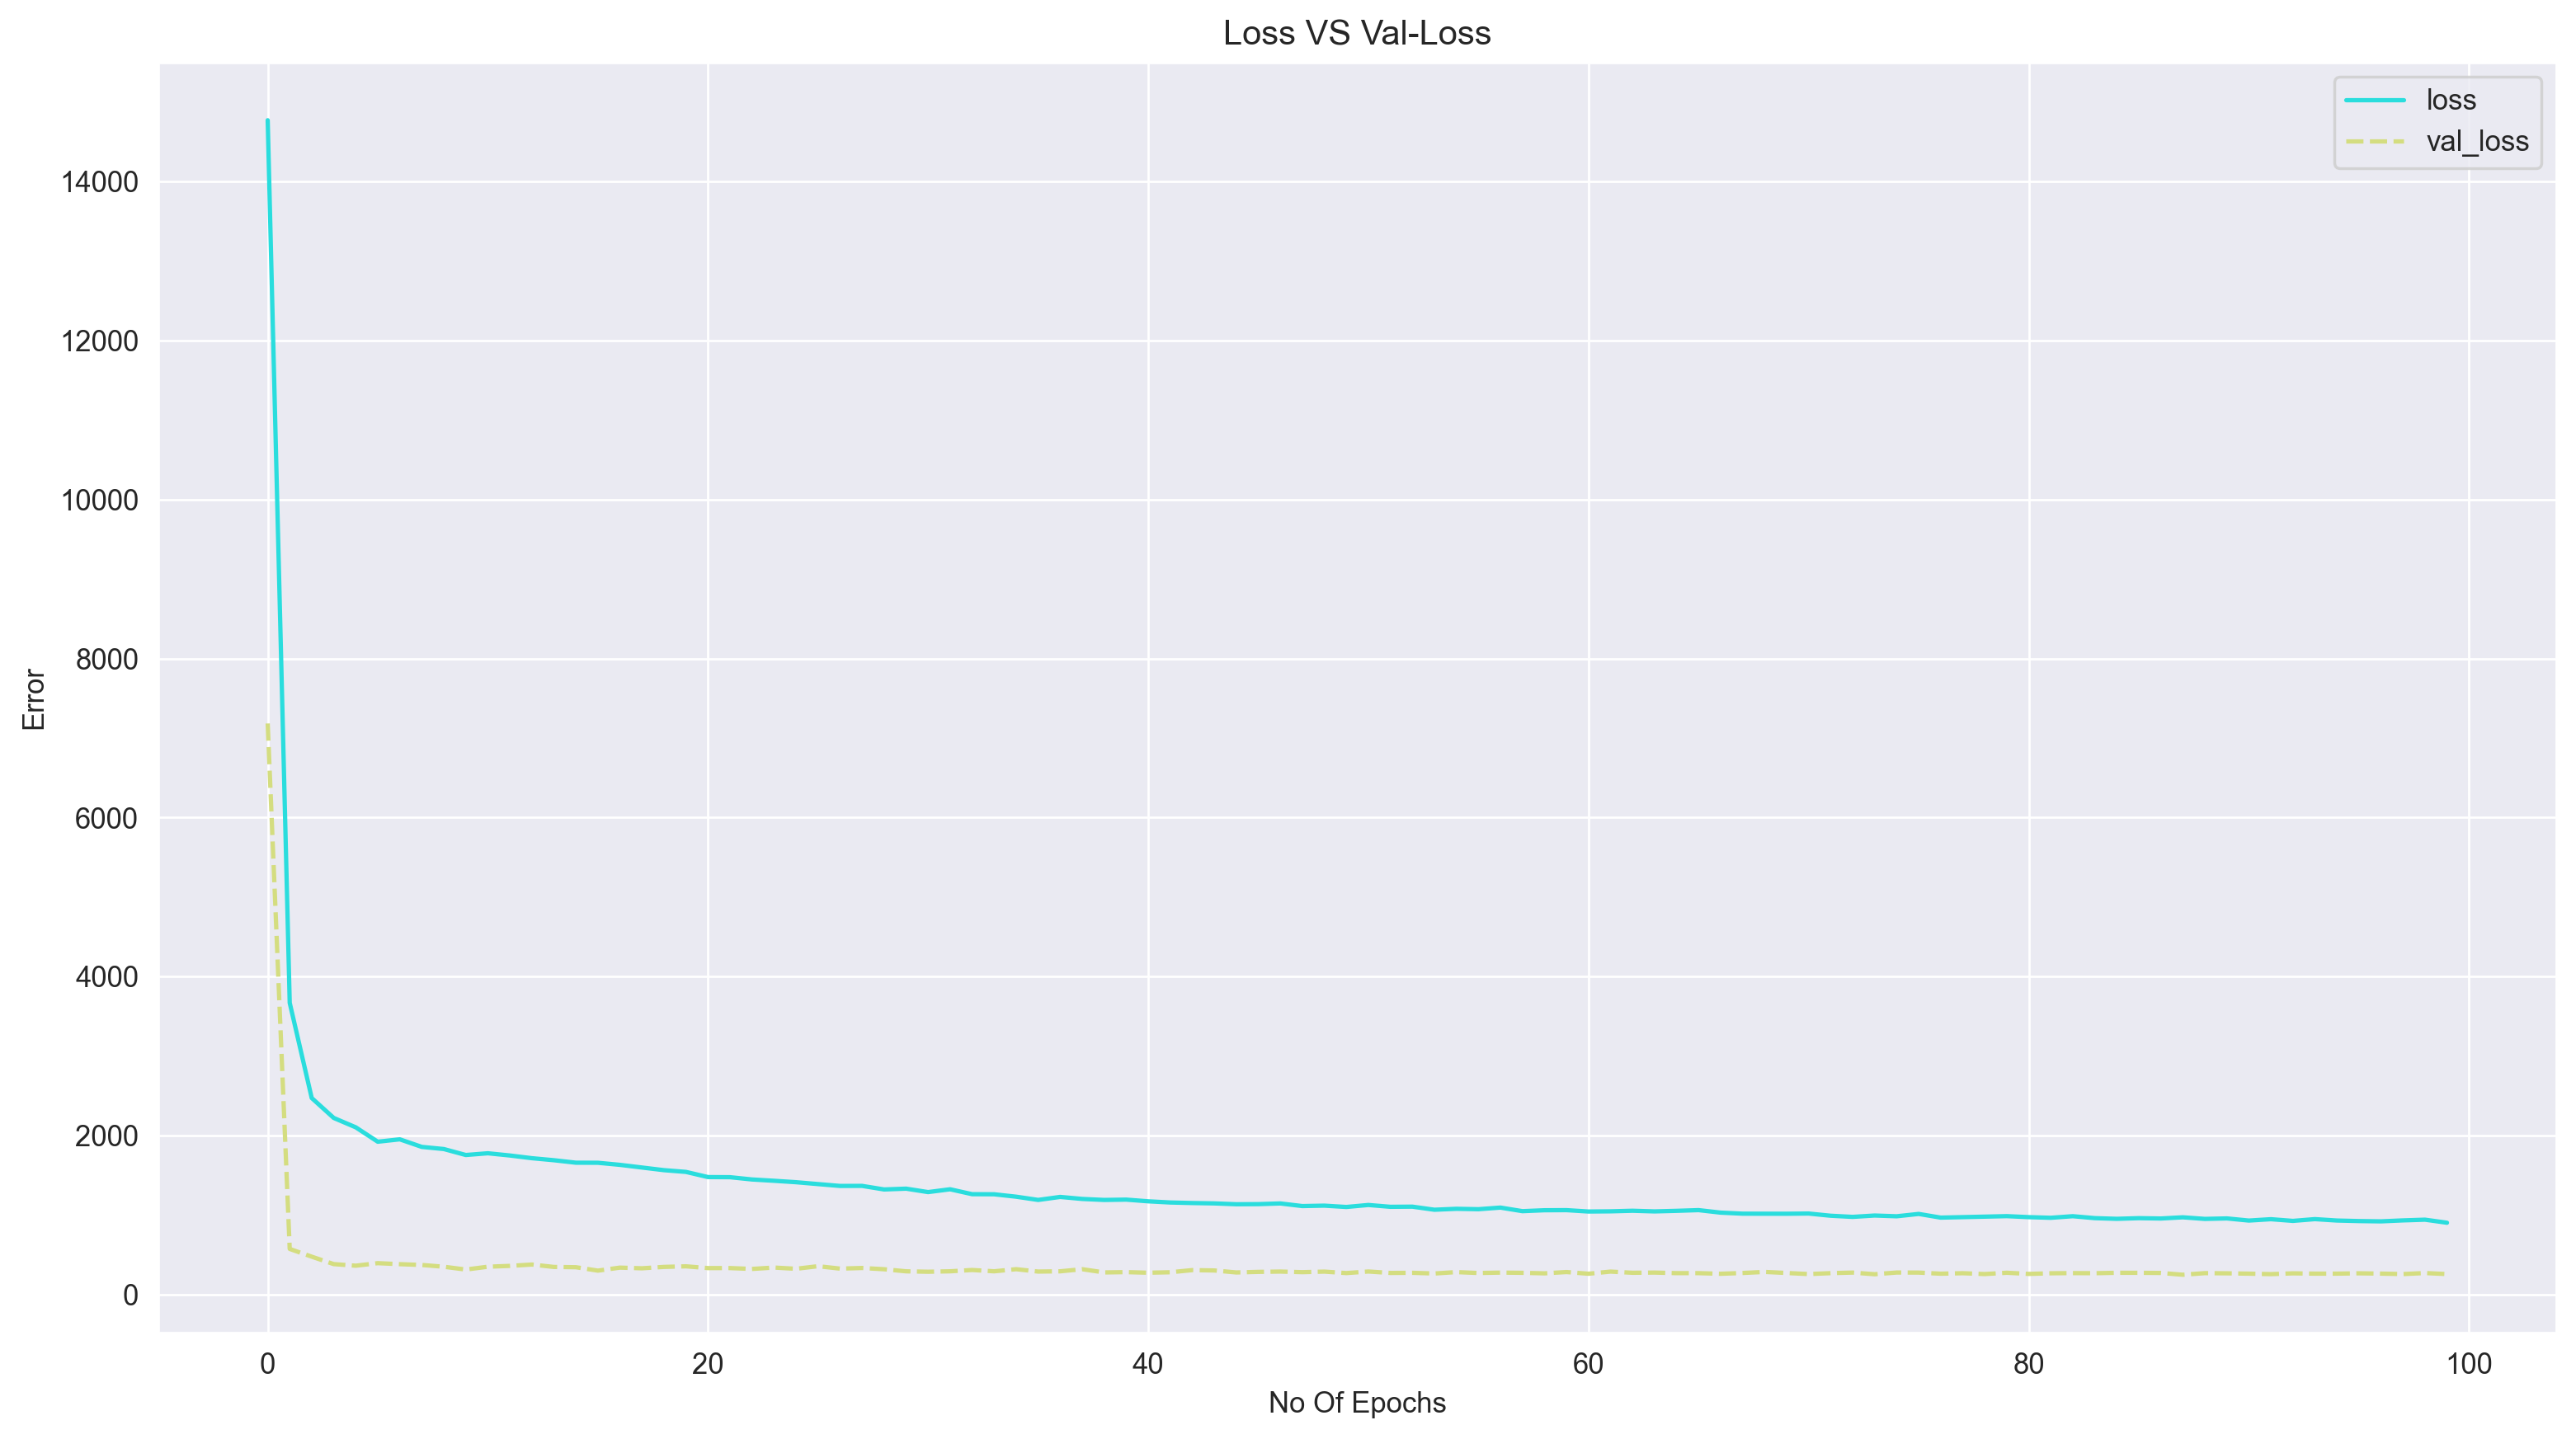

In [75]:
val_loss_all = pd.DataFrame(ann_all.history.history)

sns.lineplot(data = val_loss_all, palette='rainbow')
plt.title('Loss VS Val-Loss')
plt.ylabel('Error')
plt.xlabel('No Of Epochs')

# Compairing All Model

<AxesSubplot:title={'center':'Model With Early Stop And Drop Out Layer'}>

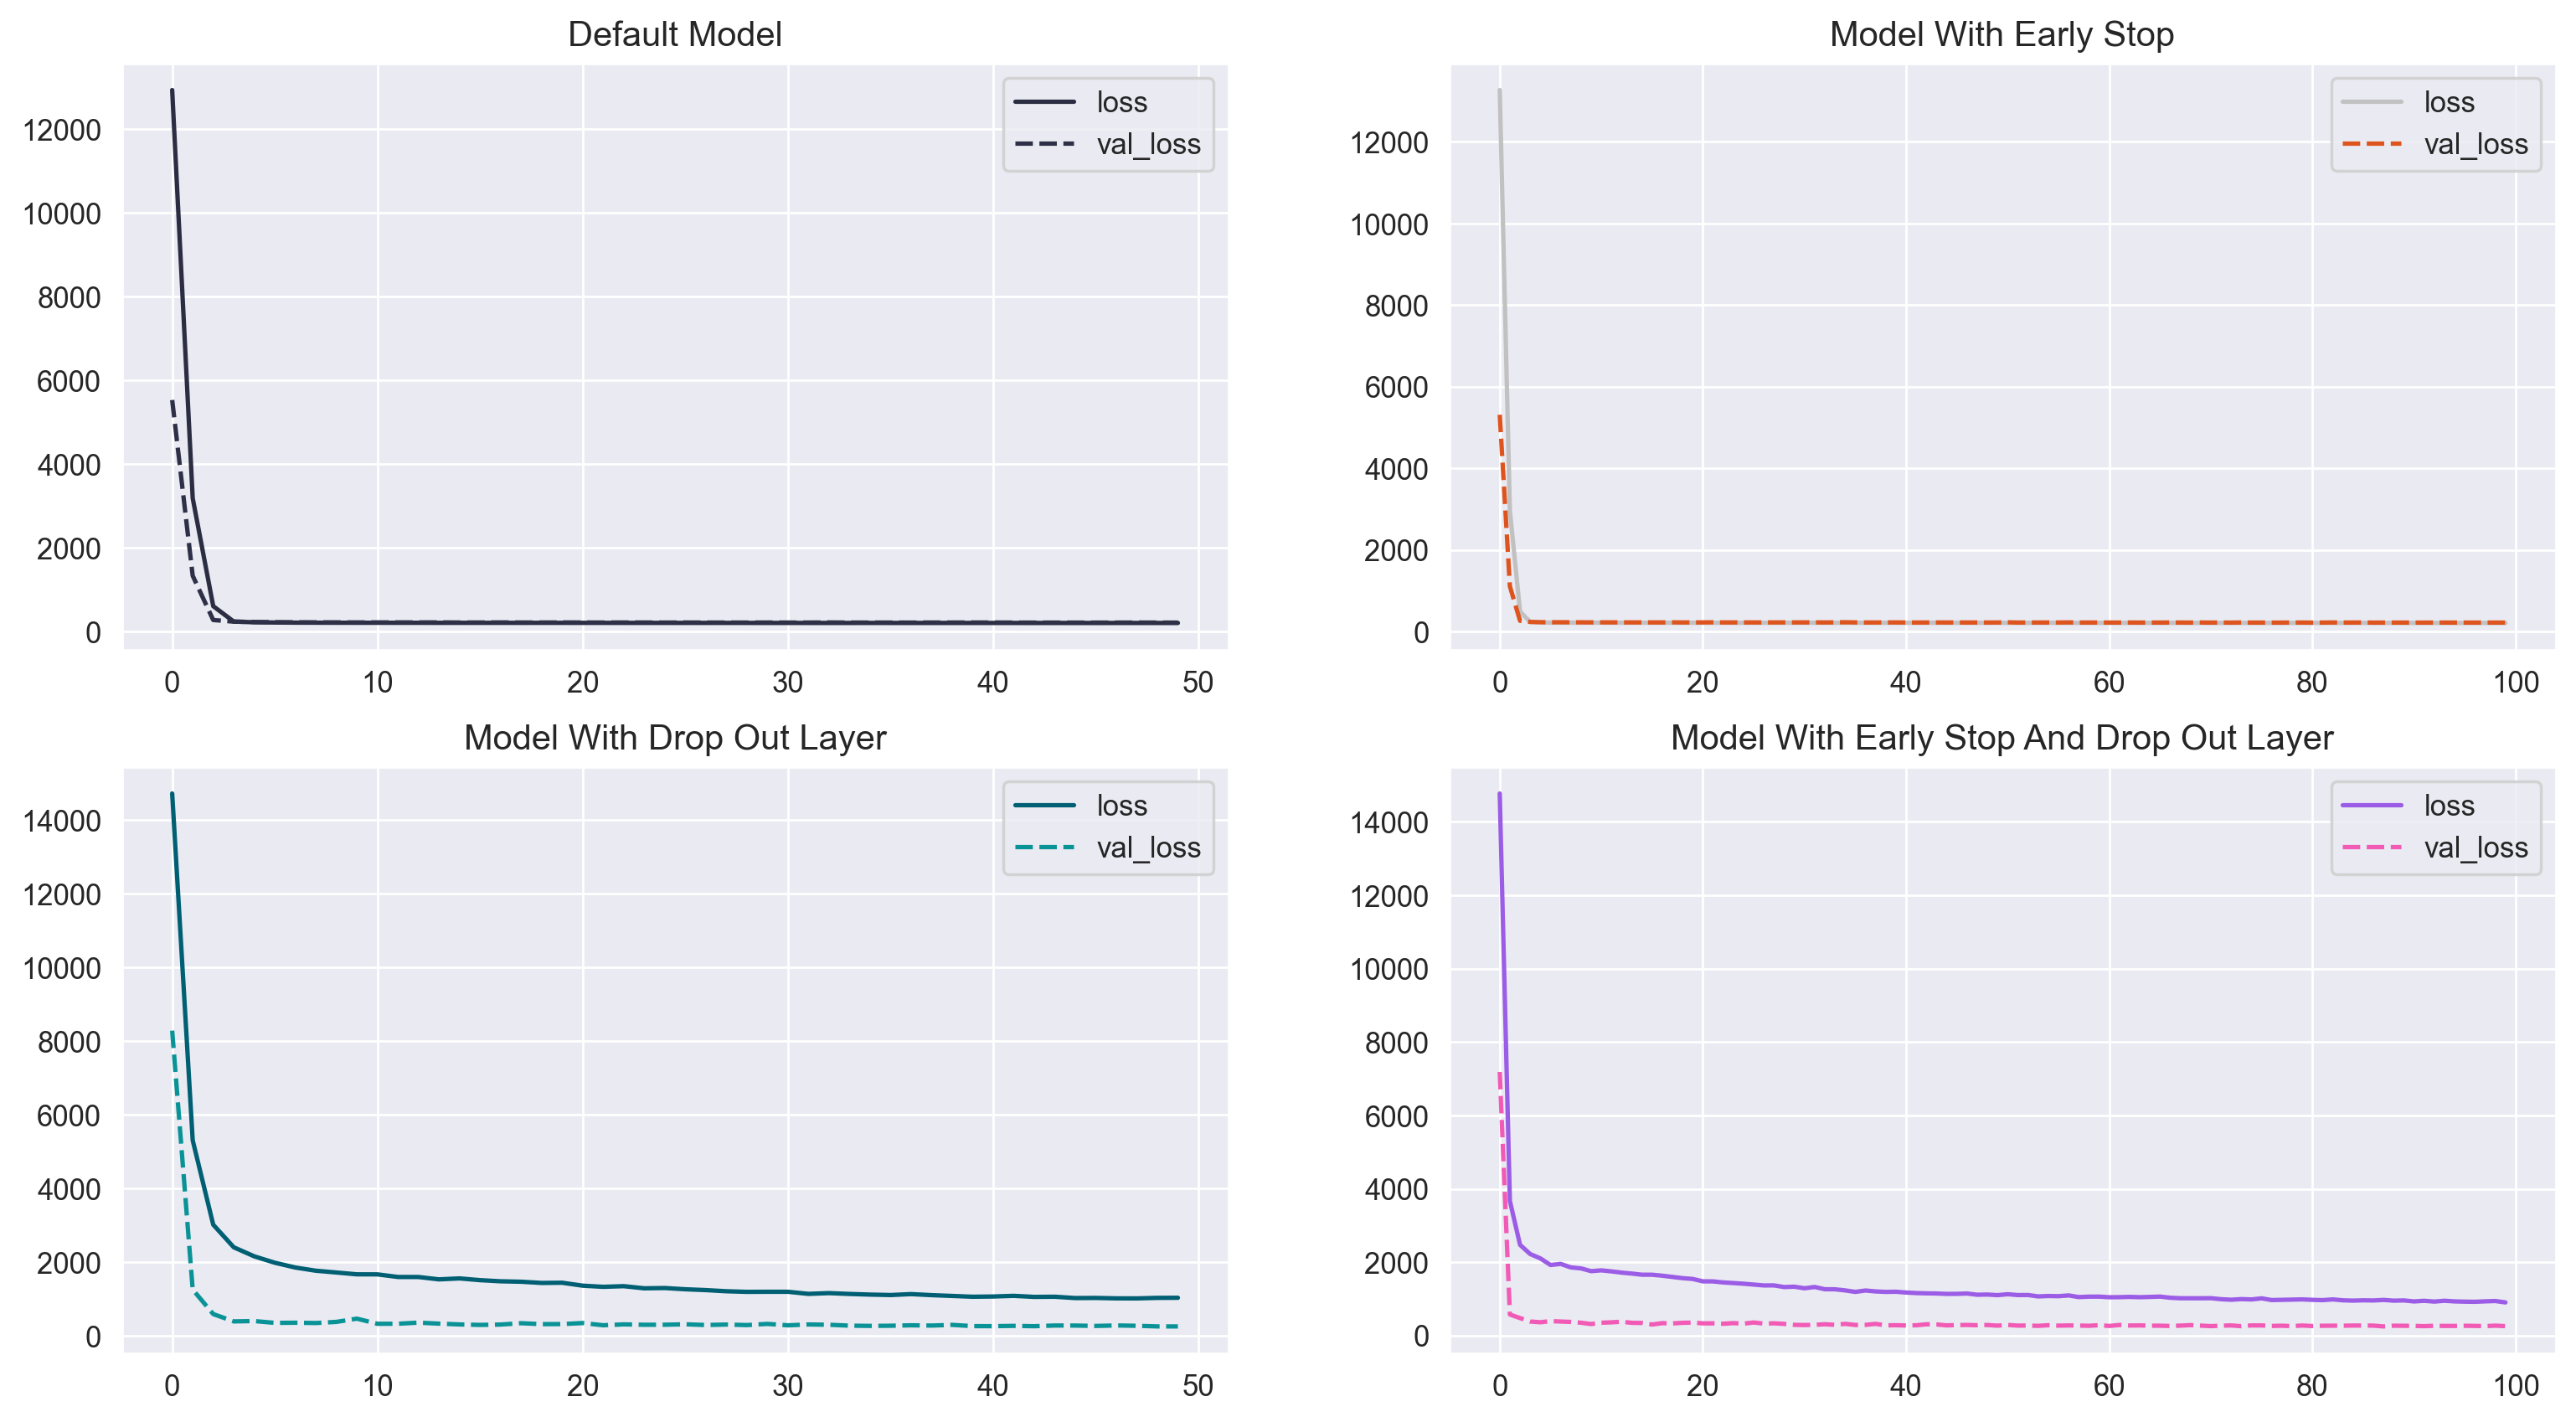

In [76]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].title.set_text('Default Model')
sns.lineplot(data=val_loss_def, ax = ax[0, 0], palette = ['#2b2d42', '#2d3047'])

ax[0, 1].title.set_text('Model With Early Stop')
sns.lineplot(data=val_loss_es, ax = ax[0, 1], palette = ['#c2c1c2', '#de541e'])

ax[1, 0].title.set_text('Model With Drop Out Layer')
sns.lineplot(data=val_loss_dol, ax = ax[1, 0], palette = ['#005f73', '#0a9396'])

ax[1, 1].title.set_text('Model With Early Stop And Drop Out Layer')
sns.lineplot(data=val_loss_all, ax = ax[1, 1], palette = [ '#9b5de5', '#f15bb5'])